# Search: Solving a Maze Using a Goal-based Agent

Student Name: **Davis Vercher**

I have used the following AI tools: ChatGPT-4 [https://chat.openai.com/share/9cada9d0-d58f-4dcd-bec9-d7d51fbdcae1](https://chat.openai.com/share/9cada9d0-d58f-4dcd-bec9-d7d51fbdcae1)

I understand that my submission needs to be my own work: **DRV**

## Instructions

Total Points: Undergrads 100 / Graduate students 110

Complete this notebook. Use the provided notebook cells and insert additional code and markdown cells as needed. Submit the completely rendered notebook as a PDF file. 


## Introduction

The agent has a map of the maze it is in and the environment is assumed to be **deterministic, discrete, and known.** The agent must use the map to plan a path through the maze from the starting location $S$ to the goal location $G$.  This is a planing exercise for a goal-based agent, so you do not need to implement an environment, just use the map to search for a path. Once the plan is made, the agent in a deterministic environment (i.e., the transition function is deterministic with the outcome of each state/action pair fixed and no randomness) can just follow the path and does not need to care about the percepts.
This is also called an **[open-loop system](https://en.wikipedia.org/wiki/Open-loop_controller).**
The execution phase is trivial and we do not implement it in this exercise.

Tree search algorithm implementations that you find online and used in general algorithms courses have often a different aim. These algorithms assume that you already have a tree in memory. We are interested in dynamically creating a search tree with the aim of finding a good/the best path from the root noteto the goal state. Follow the pseudo code presented in the text book (and replicated in the slides) closely. Ideally, we would like to search only a small part of the maze, i.e., create a search tree with as few nodes as possible. 

Several mazes for this exercise are stored as text files. Here is the small example maze:

In [171]:
with open("small_maze.txt", "r") as f:
    maze_str = f.read()
print(maze_str)

XXXXXXXXXXXXXXXXXXXXXX
X XX        X X      X
X    XXXXXX X XXXXXX X
XXXXXX     S  X      X
X    X XXXXXX XX XXXXX
X XXXX X         X   X
X        XXX XXX   X X
XXXXXXXXXX    XXXXXX X
XG         XX        X
XXXXXXXXXXXXXXXXXXXXXX



__Note:__ The mazes above contains cycles and therefore the state space may not form proper trees unless cycles are prevented. Therfore, you will need to deal with cycle detection in your code.

## Parsing and pretty printing the maze

The maze can also be displayed in color using code in the module [maze_helper.py](maze_helper.py). The code parses the string representing the maze and converts it into a `numpy` 2d array which you can use in your implementation. Position are represented as a 2-tuple of the form `(row, col)`. 

In [172]:
import maze_helper as mh

maze = mh.parse_maze(maze_str)

# look at a position in the maze by subsetting the 2d array
print("Position(0,0):", maze[0, 0])

# there is also a helper function called `look(maze, pos)` available
# which uses a 2-tuple for the position.
print("Position(8,1):", mh.look(maze, (8, 1)))

Position(0,0): X
Position(8,1): G


A helper function to visualize the maze is also available.

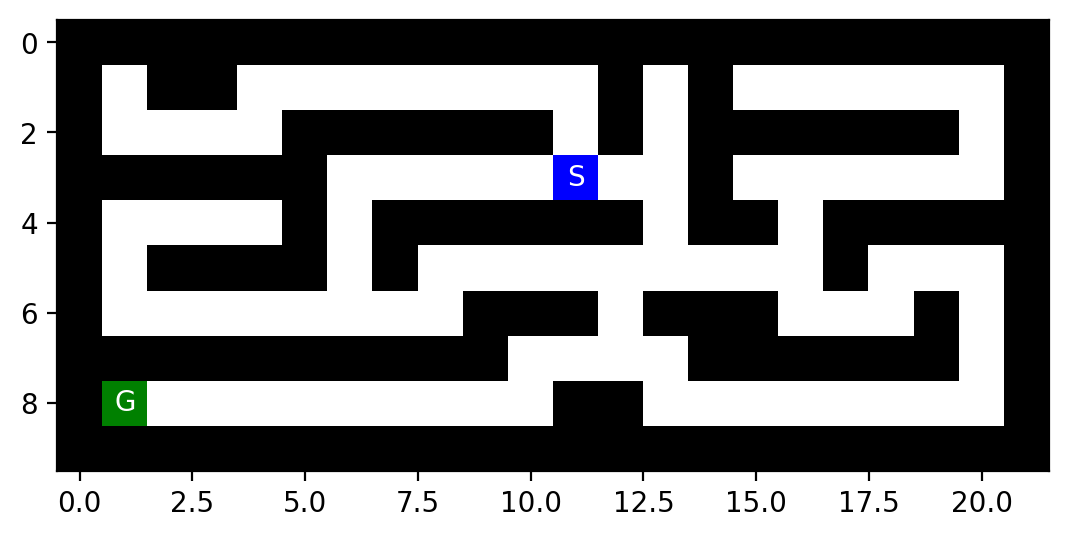

In [3]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
# use higher resolution images in notebook

mh.show_maze(maze)

Find the position of the start and the goal using the helper function `find_pos()`

In [4]:
print("Start location:", mh.find_pos(maze, what = "S"))
print("Goal location:", mh.find_pos(maze, what = "G"))

Start location: (3, 11)
Goal location: (8, 1)


Helper function documentation.

In [5]:
help(mh)

Help on module maze_helper:

NAME
    maze_helper

DESCRIPTION
    Code for the Maze Assignment by Michael Hahsler
    Usage: 
        import maze_helper as mh
        mh.show_some_mazes()

FUNCTIONS
    find_pos(maze, what='S')
        Find start/goal in a maze and returns the first one. 
        Caution: there is no error checking!
        
        Parameters:
        maze: a array with characters prodced by parse_maze()
        what: the letter to be found ('S' for start and 'G' for goal)
        
        Returns:
        a tupple (x, y) for the found position.
    
    look(maze, pos)
        Look at the label of a square with the position as an array of the form (x, y).
    
    parse_maze(maze_str)
        Convert a maze as a string into a 2d numpy array
    
    show_maze(maze, fontsize=10)
        Display a (parsed) maze as an image.
    
    welcome()
        Welcome message.

FILE
    c:\users\personal\desktop\smu\02fall2023\cs7320_artificial_intelligence\assignment 3\maze_he

## Tree structure

Here is an implementation of the basic node structure for the search algorithms (see Fig 3.7 on page 73). I have added a method that extracts the path from the root node to the current node. It can be used to get the path when the search is completed.

In [6]:
class Node:
    def __init__(self, pos, parent, action, cost):
        self.pos = tuple(pos)    # the state; positions are (row,col)
        self.parent = parent     # reference to parent node. None means root node.
        self.action = action     # action used in the transition function (root node has None)
        self.cost = cost         # for uniform cost this is the depth. It is also g(n) for A* search

    def __str__(self):
        return f"Node - pos = {self.pos}; action = {self.action}; cost = {self.cost}"
    
    def get_path_from_root(self):
        """returns nodes on the path from the root to the current node."""
        node = self
        path = [node]
    
        while not node.parent is None:
            node = node.parent
            path.append(node)
        
        path.reverse()
        
        return(path)

If needed, then you can add more fields to the class like the heuristic value $h(n)$ or $f(n)$.

Examples for how to create and use a tree and information on memory management can be found [here](../HOWTOs/trees.ipynb).

# Tasks

The goal is to:

1. Implement the following search algorithms for solving different mazes:

    - Breadth-first search (BFS)
    - Depth-first search (DFS)
    - Greedy best-first search (GBFS)
    - A* search

2. Run each of the above algorithms on the 
    - [small maze](small_maze.txt), 
    - [medium maze](medium_maze.txt), 
    - [large maze](large_maze.txt), 
    - [open maze](open_maze.txt),
    - [wall maze](wall_maze.txt),
    - [loops maze](loops_maze.txt),
    - [empty maze](empty_maze.txt), and
    - [empty 2_maze](empty_2_maze.txt).
    
3. For each problem instance and each search algorithm, report the following in a table:

    - The solution and its path cost
    - Total number of nodes expanded
    - Maximum tree depth
    - Maximum size of the frontier

4. Display each solution by marking every maze square (or state) visited and the squares on the final path.

## General [10 Points]

1. Make sure that you use the latest version of this notebook. Sync your forked repository and pull the latest revision. 
2. Your implementation can use libraries like math, numpy, scipy, but not libraries that implement inteligent agents or complete search algorithms. Try to keep the code simple! In this course, we want to learn about the algorithms and we often do not need to use object-oriented design.
3. You notebook needs to be formated professionally. 
    - Add additional markdown blocks for your description, comments in the code, add tables and use mathplotlib to produce charts where appropriate
    - Do not show debugging output or include an excessive amount of output.
    - Check that your PDF file is readable. For example, long lines are cut off in the PDF file. You don't have control over page breaks, so do not worry about these.
4. Document your code. Add a short discussion of how your implementation works and your design choices.

## Task 1: Defining the search problem and determining the problem size [10 Points]

Define the components of the search problem:

* Initial state
* Actions
* Transition model
* Goal state
* Path cost

Use verbal descriptions, variables and equations as appropriate. 

*Note:* You can swich the next block from code to Markdown and use formating.

### Defining the components of the search problem:
- **Initial state:** Each maze marks the starting position, or initial state, with an 'S.' This can be found with our 'mh.find_pos(maze, what='S')' helper function.
- **Actions:** Our agent has four possible actions (movement choices)... North, South, East, or West (as long as any of those actions does not result in hitting a wall, or 'X'). These actions are akin to moving up, down, right, and left respectively.
- **Transition model:** Given the current state (where the agent is in the maze) and an action, this model returns the resulting state after performing that action.
- **Goal state:** Position marked with a 'G'.
- **Path cost:** Each move in our maze has a unit cost of 1, so the path cost would be the total number of moves (or units) to travel from the initial state to the goal state.

Give some estimates for the problem size:

* $n$: state space size
* $d$: depth of the optimal solution
* $m$: maximum depth of tree
* $b$: maximum branching factor

Describe how you would determin these values for a given maze.

### Estimates for problem size:
- **n:** The total number of positions our agent can reach in the maze (meaning non-'X' positions). For 'small-maze' this looks to roughly be about 100-150.
- **d:** This is the shortest or more optimal path from 'S' to 'G.' For 'small-maze' it looks like 19 or 20.
- **m:** This is the worst case scenario where 'G' is still reached but in as many moves as possible. For 'small-maze' this looks like about 45-55.
- **b:** This is the max about of following nodes we can pursue from any one node. For us, we have four possible directions (actions) which means our branching factor is 4.

### How to determine these:
- **n:** Iterate through the maze line by line and count the non-'X' spaces
- **d:** Use a selected search algorithm to find the shortest path
- **m:** The worst path can be approximated to n
- **b:** We already know for our maze this value is 4

## Task 2: Uninformed search: Breadth-first and depth-first [40 Points]

Implement these search strategies. Follow the pseudocode in the textbook/slides. You can use the tree structure shown above to extract the final path from your solution.

__Notes:__
* You can find maze solving implementations online that use the map to store information. While this is an effective idea for this two-dimensional navigation problem, it typically cannot be used for other search problems. Therefore, follow the textbook and only store information in the tree created during search, and use the `reached` and `frontier` data structures.
* DSF can be implemented using the BFS tree search algorithm and simply changing the order in which the frontier is expanded (this is equivalent to best-first search with path length as the criterion to expand the next node). However, to take advantage of the significantly smaller memory footprint of DFS, you need to implement DFS in a different way without a `reached` data structure and by releasing the memory for nodes that are not needed anymore. 
* If DFS does not use a `reached` data structure, then its cycle checking abilities are limited. Remember, that DSF is incomplete if cycles cannot be prevented. You will see in your experiments that open spaces are a problem.

In [ ]:
# #Pseudo code from class (for reference)

# #Expand:
# function EXPAND(problem, node) yields nodes
#     s <-- node.STATE
#     for each action in problem.ACTIONS(s) do
#         s' <-- problem.RESULT(s, action)
#         cost <-- node.PATH-COST + problem.ACTION-COST(s, action, s')
#         yield NODE(STATE=s', PARENT=node, ACTION=action, PATH-COST=cost)

# #BFS:
# function BFS(problem) returns a solution node or failure
#     node <-- NODE(problem.INITIAL)
#     if problem.IS-GOAL(node.STATE) then return node
#     fronter <-- a FIFO queue, with node as an element
#     reached <-- {problem.INITIAL}
#         while not IS-EMPTY(frontier) do
#             node <-- POP(frontier)
#             for each child in EXPAND(problem, node) do
#                 s <-- child.STATE
#                 if problem.IS-GOAL(s) then return child
#                 if s is not in reached then
#                     add s to reached
#                     add child to frontier
#     return failure

# #DFS:
# function DFS(problem, l) returns a node or failure or cutoff
#     frontier <-- a LIFO queue (stack) with NODE(problem.INITIAL) as an element
#     result <-- failure
#     while not IS-EMPTY(frontier) do
#         node <-- POP(frontier)
#         if problem.IS-GOAL(node.STATE) then return node
#         if DEPTH(node) > l then
#             result <-- cutoff
#         else if not IS-CYCLE(node) do
#             for each child in EXPAND(problem, node) do
#                 add child to frontier
#     return result

In [135]:
import maze_helper as mh
import queue
import heapq
import random
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
ACTIONS = ["up", "down", "left", "right"]
DIRECTIONS = {
    "up": (-1, 0),
    "down": (1, 0),
    "left": (0, -1),
    "right": (0, 1)
}

def is_valid(maze, pos):
    """Check if a position is valid (i.e., within the maze boundaries and not a wall)"""
    x, y = pos
    return 0 <= x < maze.shape[0] and 0 <= y < maze.shape[1] and maze[x, y] != 'X'

def possible_actions(maze, pos):
    """Return a list of possible actions given a maze and a current position."""
    return [action for action in ACTIONS if is_valid(maze, (pos[0] + DIRECTIONS[action][0], pos[1] + DIRECTIONS[action][1]))]

def result(pos, action):
    """Return the resulting position from applying an action to a position."""
    return (pos[0] + DIRECTIONS[action][0], pos[1] + DIRECTIONS[action][1])


In [76]:
def BFS(maze):
    start = mh.find_pos(maze, what="S")
    goal = mh.find_pos(maze, what="G")
    
    # Create the initial node and the frontier using a queue
    initial_node = Node(pos=start, parent=None, action=None, cost=0)
    frontier = [initial_node]
    reached = set()
    reached.add(start)
    
    # Metrics tracking
    nodes_expanded = 0
    max_tree_depth = 0
    max_nodes_in_memory = 0
    max_frontier_size = 0
    
    while frontier:
        node = frontier.pop(0)  # Use pop(0) to dequeue from the front
        
        nodes_expanded += 1
        max_tree_depth = max(max_tree_depth, node.cost)
        
        for action in possible_actions(maze, node.pos):
            child_pos = result(node.pos, action)
            if child_pos not in reached:
                child = Node(pos=child_pos, parent=node, action=action, cost=node.cost+1)
                reached.add(child_pos)
                frontier.append(child)
                
        # Update max metrics after each iteration
        max_nodes_in_memory = max(max_nodes_in_memory, len(frontier) + len(reached))
        
        # Update max frontier size after considering all children of the current node
        max_frontier_size = max(max_frontier_size, len(frontier))
        
        if node.pos == goal:
            return node, nodes_expanded, max_tree_depth, max_nodes_in_memory, max_frontier_size
                
    return None, nodes_expanded, max_tree_depth, max_nodes_in_memory, len(frontier)


In [78]:
def DFS(maze):
    start = mh.find_pos(maze, what="S")
    goal = mh.find_pos(maze, what="G")
    
    # Metrics tracking
    nodes_expanded = 0
    max_tree_depth = 0
    max_nodes_in_memory = 0  # Here, this will be more like the max path depth due to DFS's nature
    max_frontier_size = 0  # Represents the maximum stack size (recursion depth)
    
    def dfs_recursive(node, path, frontier):
        nonlocal nodes_expanded, max_tree_depth, max_nodes_in_memory, max_frontier_size
        
        # Metrics updates
        nodes_expanded += 1
        max_tree_depth = max(max_tree_depth, node.cost)
        max_nodes_in_memory = max(max_nodes_in_memory, len(path))
        max_frontier_size = max(max_frontier_size, len(frontier))

        # Check for goal
        if node.pos == goal:
            return node
        
        # Mark the current node as part of the path
        path.add(node.pos)
        
        for action in possible_actions(maze, node.pos):
            child_pos = result(node.pos, action)
            
            # If the child node is not in the current path (avoiding cycles)
            if child_pos not in path:
                child = Node(pos=child_pos, parent=node, action=action, cost=node.cost + 1)
                frontier.append(child)
                result_node = dfs_recursive(child, path, frontier)
                
                # If the child path leads to the goal, return it
                if result_node:
                    return result_node
                frontier.pop()
        
        # Remove the current node from the path as we backtrack
        path.remove(node.pos)
        return None
    
    # Start the DFS
    result_node = dfs_recursive(Node(pos=start, parent=None, action=None, cost=0), set(), [])
    
    if result_node:
        return result_node, nodes_expanded, max_tree_depth, max_nodes_in_memory, max_frontier_size
    else:
        return None, nodes_expanded, max_tree_depth, max_nodes_in_memory, len(frontier)


In [65]:
def visualize_path(maze, node):
    """Mark the path from the node to the root and visualize the maze."""

    path = node.get_path_from_root()

    for n in path:
        if maze[n.pos[0], n.pos[1]] not in ['S', 'G']:
            maze[n.pos[0], n.pos[1]] = 'P'
    
    mh.show_maze(maze)

### **Small Maze (BFS and DFS)**

#### BFS

Found a path with cost:    19
Number of nodes expanded:  92
Max tree depth:            19
Max nodes in memory:       95
Max frontier size:         8


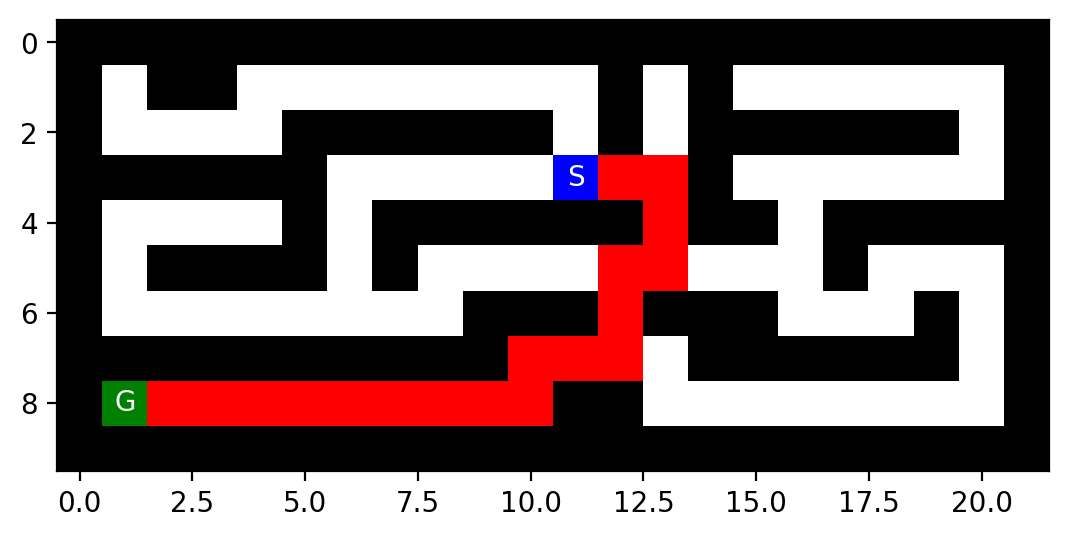

In [77]:
with open('small_maze.txt', 'r') as f:
    maze_str = f.read()
    maze = mh.parse_maze(maze_str)

result_node, nodes_expanded, max_tree_depth, max_nodes_in_memory, max_frontier_size = BFS(maze)
    
print(f"Found a path with cost:    {result_node.cost}")
print(f"Number of nodes expanded:  {nodes_expanded}")
print(f"Max tree depth:            {max_tree_depth}")
print(f"Max nodes in memory:       {max_nodes_in_memory}")
print(f"Max frontier size:         {max_frontier_size}")
visualize_path(maze, result_node)

#### DFS

Found a path with cost:    29
Number of nodes expanded:  54
Max tree depth:            29
Max nodes in memory:       29
Max frontier size:         29


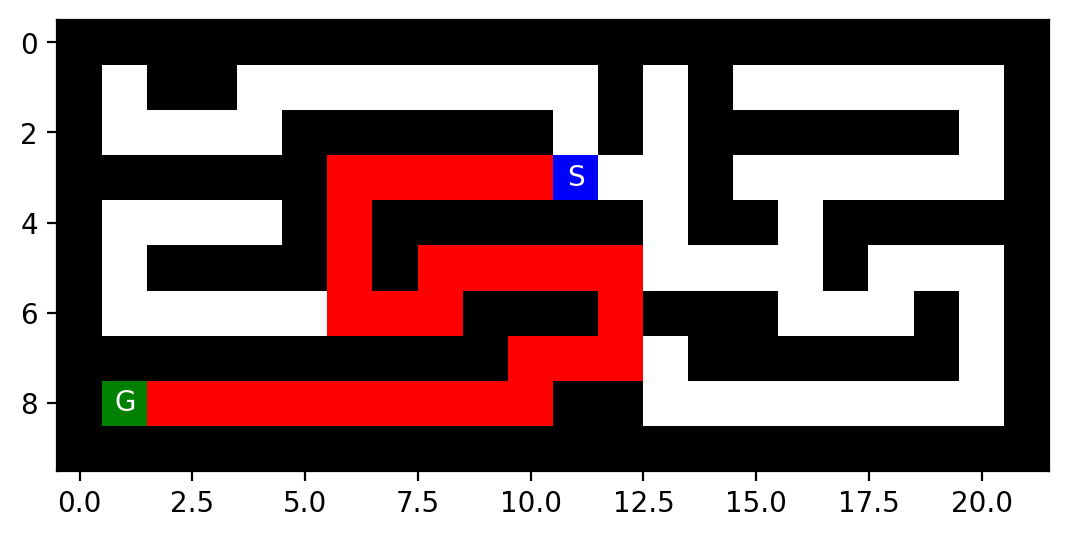

In [79]:
with open('small_maze.txt', 'r') as f:
    maze_str = f.read()
    maze = mh.parse_maze(maze_str)

result_node, nodes_expanded, max_tree_depth, max_nodes_in_memory, max_frontier_size = DFS(maze)
    
print(f"Found a path with cost:    {result_node.cost}")
print(f"Number of nodes expanded:  {nodes_expanded}")
print(f"Max tree depth:            {max_tree_depth}")
print(f"Max nodes in memory:       {max_nodes_in_memory}")
print(f"Max frontier size:         {max_frontier_size}")
visualize_path(maze, result_node)

### **Medium Maze (BFS and DFS)**

#### BFS

Found a path with cost:    68
Number of nodes expanded:  270
Max tree depth:            68
Max nodes in memory:       275
Max frontier size:         8


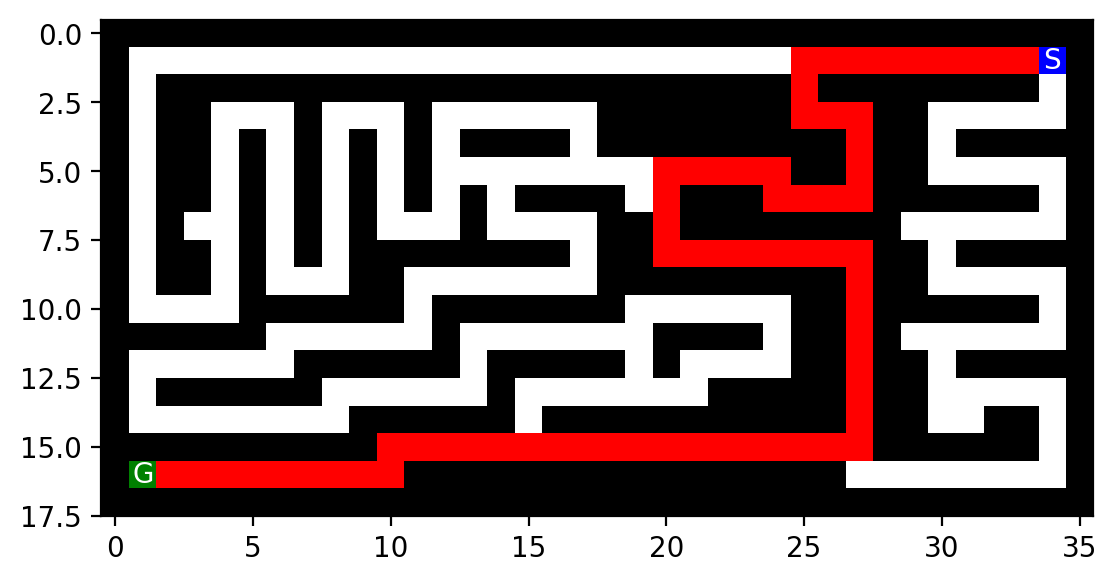

In [80]:
with open('medium_maze.txt', 'r') as f:
    maze_str = f.read()
    maze = mh.parse_maze(maze_str)

result_node, nodes_expanded, max_tree_depth, max_nodes_in_memory, max_frontier_size = BFS(maze)
    
print(f"Found a path with cost:    {result_node.cost}")
print(f"Number of nodes expanded:  {nodes_expanded}")
print(f"Max tree depth:            {max_tree_depth}")
print(f"Max nodes in memory:       {max_nodes_in_memory}")
print(f"Max frontier size:         {max_frontier_size}")
visualize_path(maze, result_node)

#### DFS

Found a path with cost:    164
Number of nodes expanded:  259
Max tree depth:            164
Max nodes in memory:       164
Max frontier size:         164


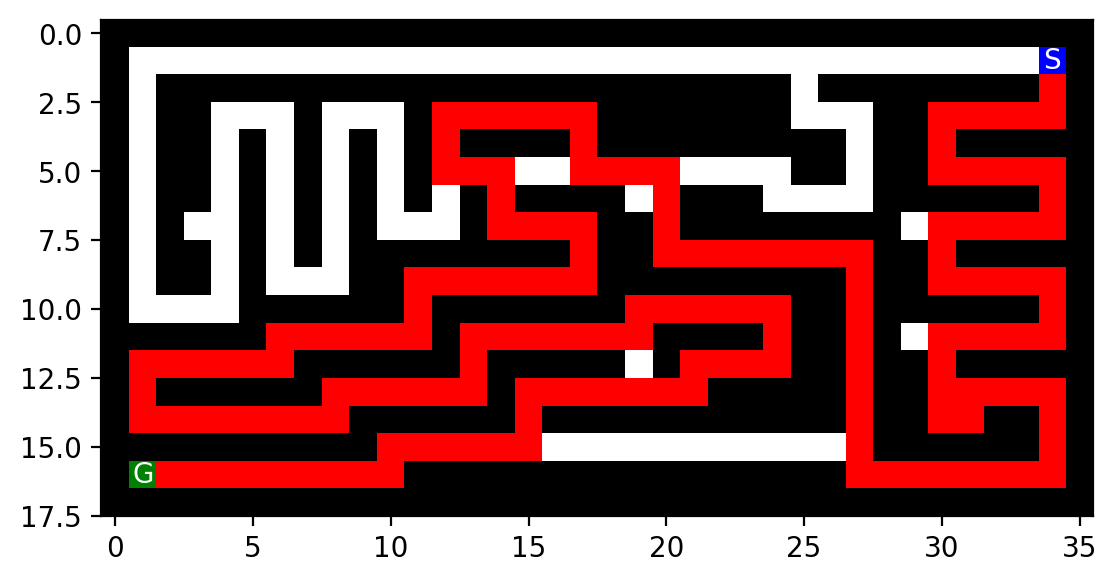

In [81]:
with open('medium_maze.txt', 'r') as f:
    maze_str = f.read()
    maze = mh.parse_maze(maze_str)

result_node, nodes_expanded, max_tree_depth, max_nodes_in_memory, max_frontier_size = DFS(maze)
    
print(f"Found a path with cost:    {result_node.cost}")
print(f"Number of nodes expanded:  {nodes_expanded}")
print(f"Max tree depth:            {max_tree_depth}")
print(f"Max nodes in memory:       {max_nodes_in_memory}")
print(f"Max frontier size:         {max_frontier_size}")
visualize_path(maze, result_node)

### Large Maze (BFS/DFS)

#### BFS

Found a path with cost:    210
Number of nodes expanded:  621
Max tree depth:            210
Max nodes in memory:       627
Max frontier size:         8


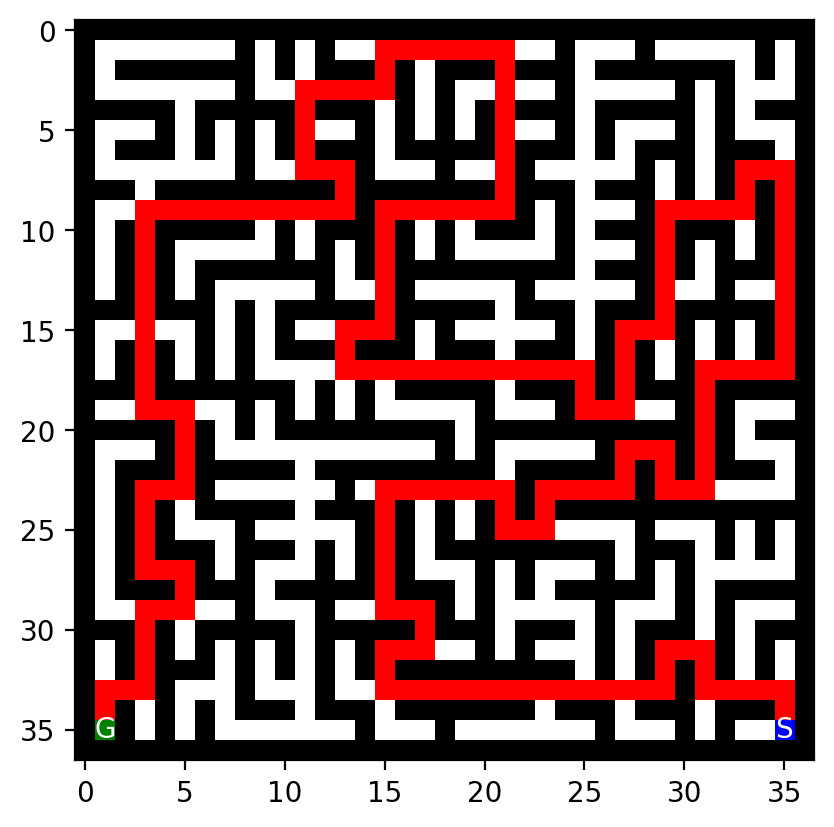

In [82]:
with open('large_maze.txt', 'r') as f:
    maze_str = f.read()
    maze = mh.parse_maze(maze_str)

result_node, nodes_expanded, max_tree_depth, max_nodes_in_memory, max_frontier_size = BFS(maze)
    
print(f"Found a path with cost:    {result_node.cost}")
print(f"Number of nodes expanded:  {nodes_expanded}")
print(f"Max tree depth:            {max_tree_depth}")
print(f"Max nodes in memory:       {max_nodes_in_memory}")
print(f"Max frontier size:         {max_frontier_size}")
visualize_path(maze, result_node)

#### DFS

Found a path with cost:    210
Number of nodes expanded:  470
Max tree depth:            210
Max nodes in memory:       210
Max frontier size:         210


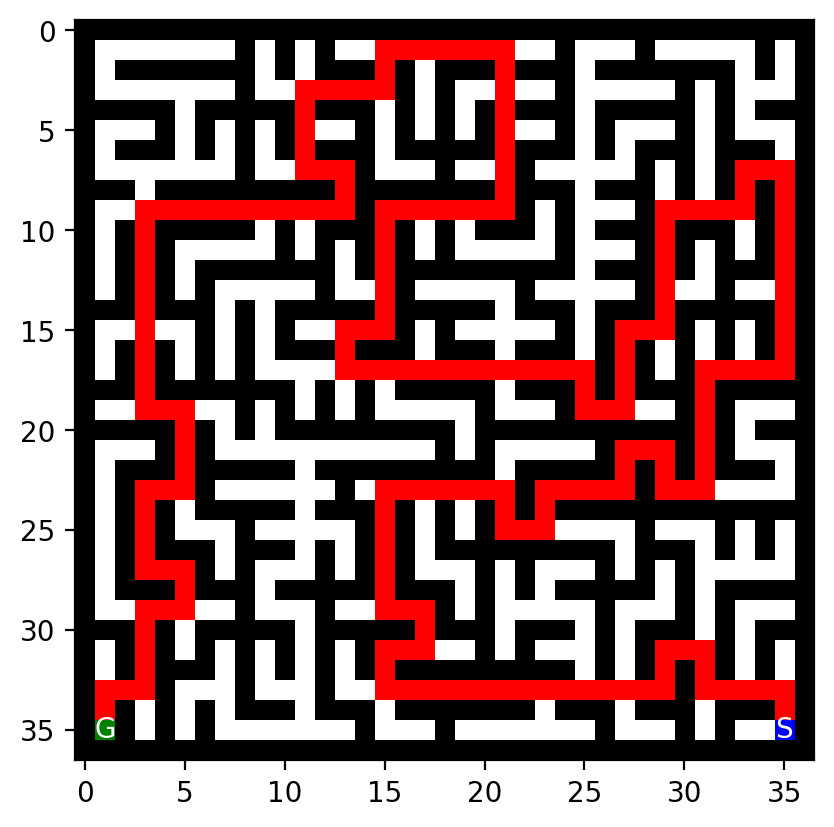

In [84]:
with open('large_maze.txt', 'r') as f:
    maze_str = f.read()
    maze = mh.parse_maze(maze_str)

result_node, nodes_expanded, max_tree_depth, max_nodes_in_memory, max_frontier_size = DFS(maze)
    
print(f"Found a path with cost:    {result_node.cost}")
print(f"Number of nodes expanded:  {nodes_expanded}")
print(f"Max tree depth:            {max_tree_depth}")
print(f"Max nodes in memory:       {max_nodes_in_memory}")
print(f"Max frontier size:         {max_frontier_size}")
visualize_path(maze, result_node)

### Open Maze (BFS/DFS)

#### BFS

Found a path with cost:    54
Number of nodes expanded:  683
Max tree depth:            54
Max nodes in memory:       687
Max frontier size:         25


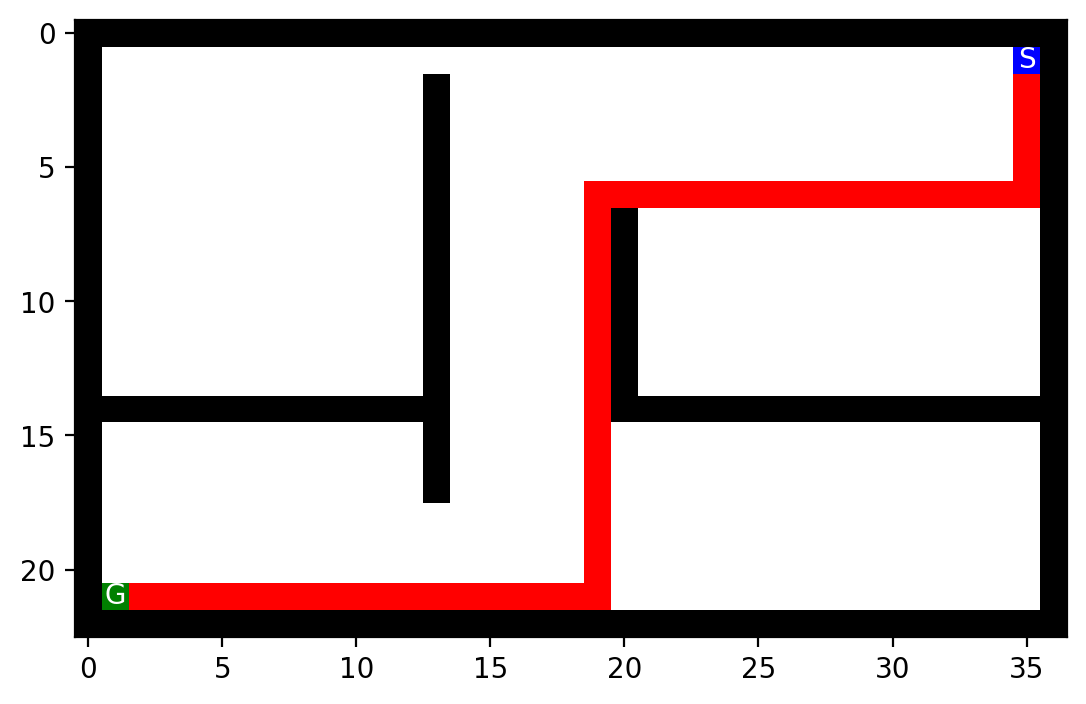

In [85]:
with open('open_maze.txt', 'r') as f:
    maze_str = f.read()
    maze = mh.parse_maze(maze_str)

result_node, nodes_expanded, max_tree_depth, max_nodes_in_memory, max_frontier_size = BFS(maze)
    
print(f"Found a path with cost:    {result_node.cost}")
print(f"Number of nodes expanded:  {nodes_expanded}")
print(f"Max tree depth:            {max_tree_depth}")
print(f"Max nodes in memory:       {max_nodes_in_memory}")
print(f"Max frontier size:         {max_frontier_size}")
visualize_path(maze, result_node)

#### DFS

In [86]:
with open('open_maze.txt', 'r') as f:
    maze_str = f.read()
    maze = mh.parse_maze(maze_str)

result_node, nodes_expanded, max_tree_depth, max_nodes_in_memory, max_frontier_size = DFS(maze)
    
print(f"Found a path with cost:    {result_node.cost}")
print(f"Number of nodes expanded:  {nodes_expanded}")
print(f"Max tree depth:            {max_tree_depth}")
print(f"Max nodes in memory:       {max_nodes_in_memory}")
print(f"Max frontier size:         {max_frontier_size}")
visualize_path(maze, result_node)

KeyboardInterrupt: 

### Wall Maze (BFS/DFS)

#### BFS

Found a path with cost:    14
Number of nodes expanded:  89
Max tree depth:            14
Max nodes in memory:       95
Max frontier size:         11


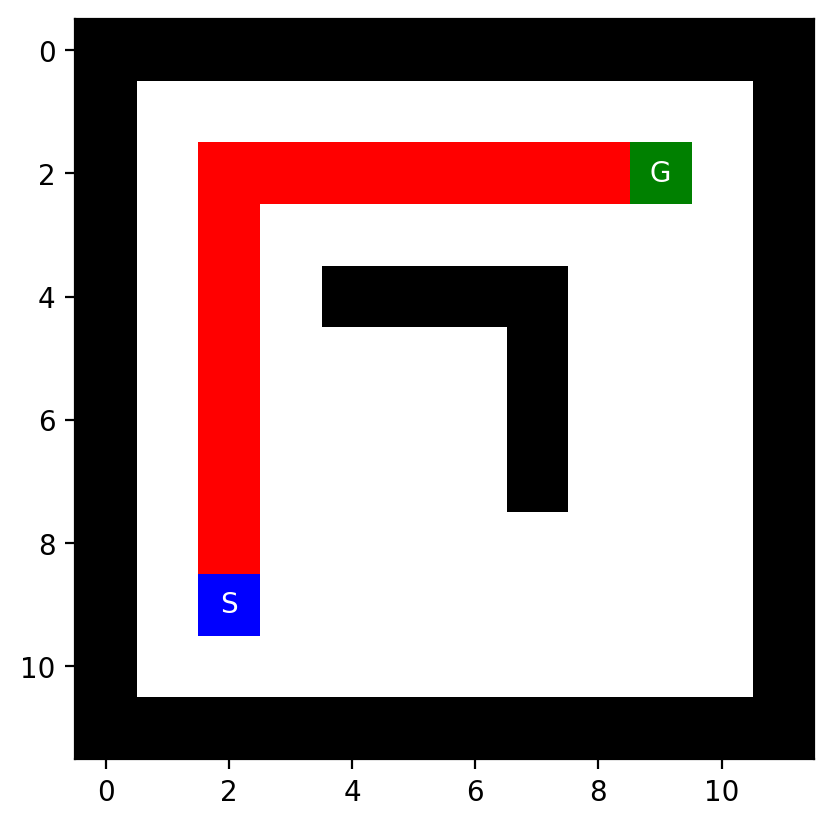

In [87]:
with open('wall_maze.txt', 'r') as f:
    maze_str = f.read()
    maze = mh.parse_maze(maze_str)

result_node, nodes_expanded, max_tree_depth, max_nodes_in_memory, max_frontier_size = BFS(maze)
    
print(f"Found a path with cost:    {result_node.cost}")
print(f"Number of nodes expanded:  {nodes_expanded}")
print(f"Max tree depth:            {max_tree_depth}")
print(f"Max nodes in memory:       {max_nodes_in_memory}")
print(f"Max frontier size:         {max_frontier_size}")
visualize_path(maze, result_node)

#### DFS

Found a path with cost:    60
Number of nodes expanded:  12638
Max tree depth:            72
Max nodes in memory:       72
Max frontier size:         72


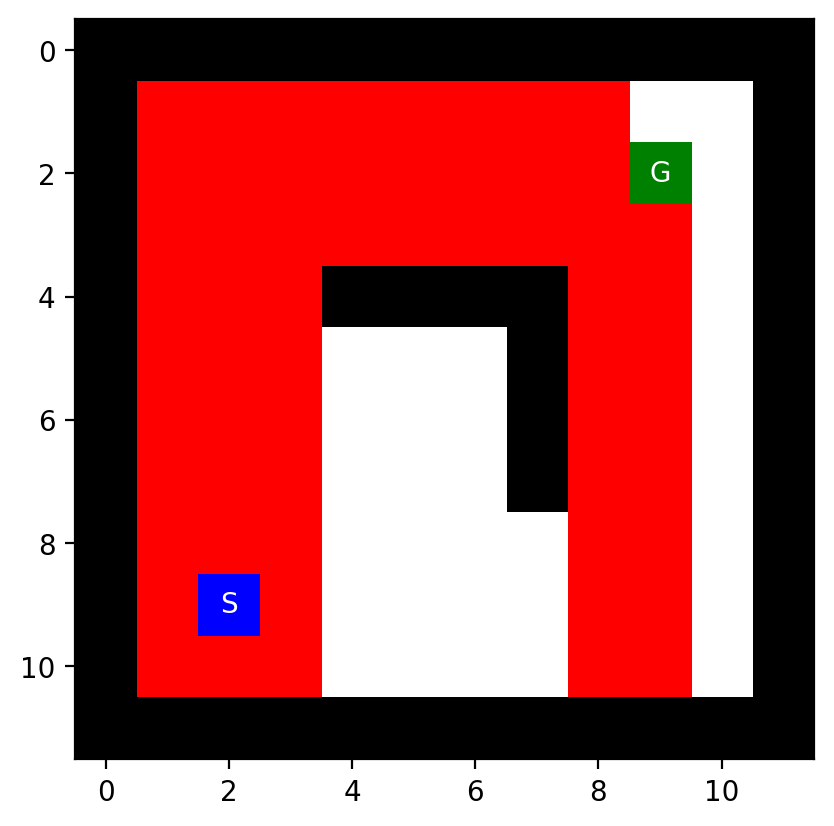

In [88]:
with open('wall_maze.txt', 'r') as f:
    maze_str = f.read()
    maze = mh.parse_maze(maze_str)

result_node, nodes_expanded, max_tree_depth, max_nodes_in_memory, max_frontier_size = DFS(maze)
    
print(f"Found a path with cost:    {result_node.cost}")
print(f"Number of nodes expanded:  {nodes_expanded}")
print(f"Max tree depth:            {max_tree_depth}")
print(f"Max nodes in memory:       {max_nodes_in_memory}")
print(f"Max frontier size:         {max_frontier_size}")
visualize_path(maze, result_node)

### Loops Maze (BFS/DFS)

#### BFS

Found a path with cost:    23
Number of nodes expanded:  72
Max tree depth:            23
Max nodes in memory:       74
Max frontier size:         8


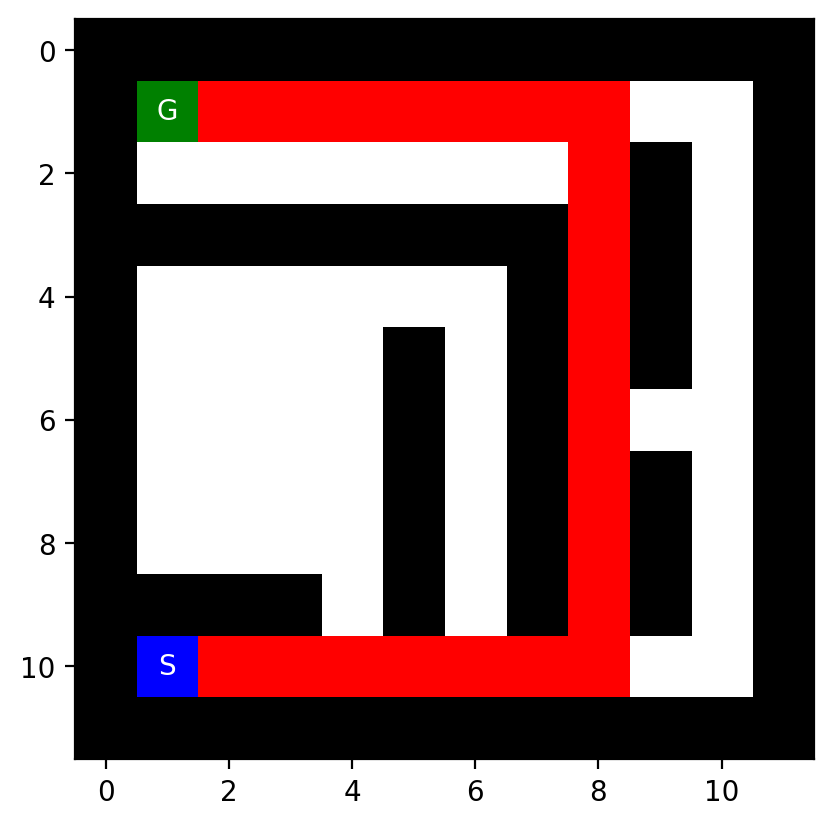

In [89]:
with open('loops_maze.txt', 'r') as f:
    maze_str = f.read()
    maze = mh.parse_maze(maze_str)

result_node, nodes_expanded, max_tree_depth, max_nodes_in_memory, max_frontier_size = BFS(maze)
    
print(f"Found a path with cost:    {result_node.cost}")
print(f"Number of nodes expanded:  {nodes_expanded}")
print(f"Max tree depth:            {max_tree_depth}")
print(f"Max nodes in memory:       {max_nodes_in_memory}")
print(f"Max frontier size:         {max_frontier_size}")
visualize_path(maze, result_node)

#### DFS

Found a path with cost:    41
Number of nodes expanded:  1180
Max tree depth:            41
Max nodes in memory:       41
Max frontier size:         41


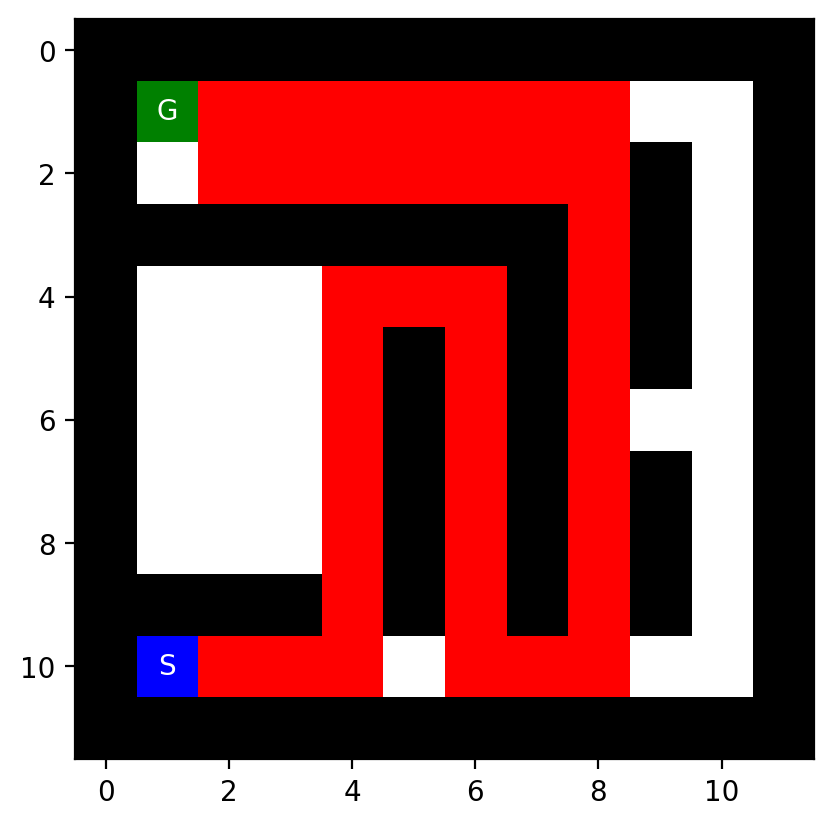

In [90]:
with open('loops_maze.txt', 'r') as f:
    maze_str = f.read()
    maze = mh.parse_maze(maze_str)

result_node, nodes_expanded, max_tree_depth, max_nodes_in_memory, max_frontier_size = DFS(maze)
    
print(f"Found a path with cost:    {result_node.cost}")
print(f"Number of nodes expanded:  {nodes_expanded}")
print(f"Max tree depth:            {max_tree_depth}")
print(f"Max nodes in memory:       {max_nodes_in_memory}")
print(f"Max frontier size:         {max_frontier_size}")
visualize_path(maze, result_node)

### Empty Maze (BFS/DFS)

Found a path with cost:    14
Number of nodes expanded:  96
Max tree depth:            14
Max nodes in memory:       102
Max frontier size:         12


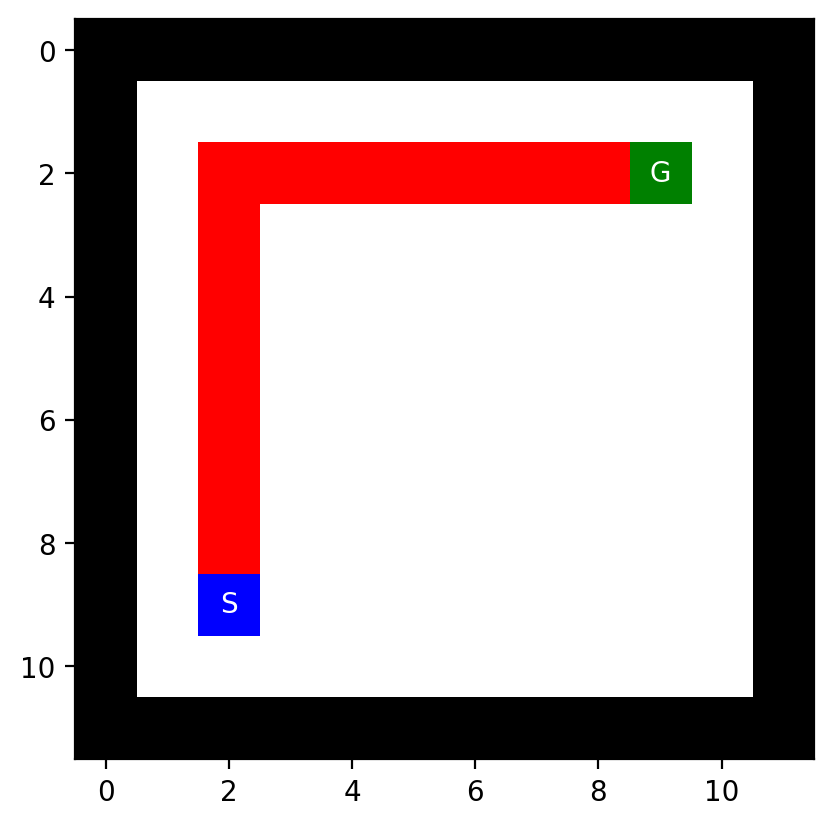

In [91]:
with open('empty_maze.txt', 'r') as f:
    maze_str = f.read()
    maze = mh.parse_maze(maze_str)

result_node, nodes_expanded, max_tree_depth, max_nodes_in_memory, max_frontier_size = BFS(maze)
    
print(f"Found a path with cost:    {result_node.cost}")
print(f"Number of nodes expanded:  {nodes_expanded}")
print(f"Max tree depth:            {max_tree_depth}")
print(f"Max nodes in memory:       {max_nodes_in_memory}")
print(f"Max frontier size:         {max_frontier_size}")
visualize_path(maze, result_node)

#### DFS

Found a path with cost:    88
Number of nodes expanded:  89
Max tree depth:            88
Max nodes in memory:       88
Max frontier size:         88


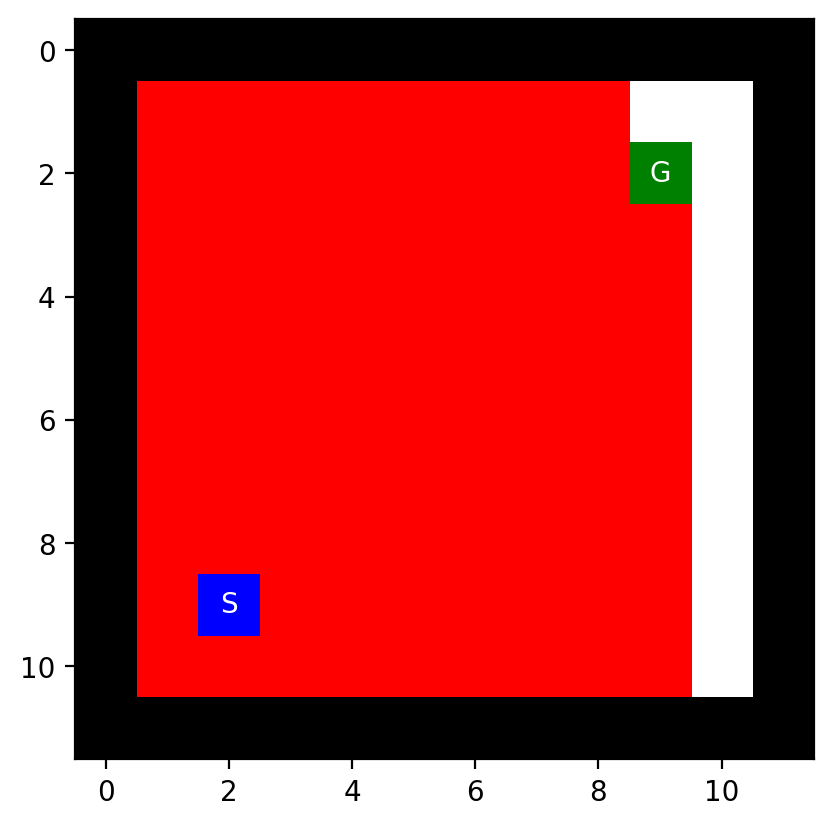

In [92]:
with open('empty_maze.txt', 'r') as f:
    maze_str = f.read()
    maze = mh.parse_maze(maze_str)

result_node, nodes_expanded, max_tree_depth, max_nodes_in_memory, max_frontier_size = DFS(maze)
    
print(f"Found a path with cost:    {result_node.cost}")
print(f"Number of nodes expanded:  {nodes_expanded}")
print(f"Max tree depth:            {max_tree_depth}")
print(f"Max nodes in memory:       {max_nodes_in_memory}")
print(f"Max frontier size:         {max_frontier_size}")
visualize_path(maze, result_node)

### Empty Maze 2 (BFS/DFS)

#### BFS

Found a path with cost:    14
Number of nodes expanded:  96
Max tree depth:            14
Max nodes in memory:       102
Max frontier size:         12


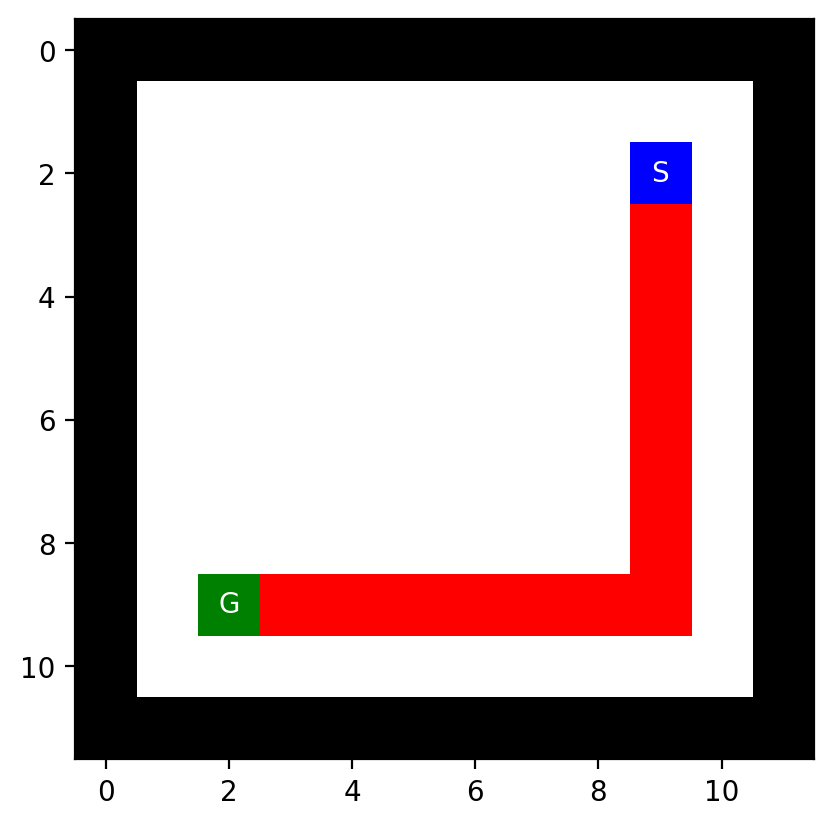

In [93]:
with open('empty_2_maze.txt', 'r') as f:
    maze_str = f.read()
    maze = mh.parse_maze(maze_str)

result_node, nodes_expanded, max_tree_depth, max_nodes_in_memory, max_frontier_size = BFS(maze)
    
print(f"Found a path with cost:    {result_node.cost}")
print(f"Number of nodes expanded:  {nodes_expanded}")
print(f"Max tree depth:            {max_tree_depth}")
print(f"Max nodes in memory:       {max_nodes_in_memory}")
print(f"Max frontier size:         {max_frontier_size}")
visualize_path(maze, result_node)

#### DFS

Found a path with cost:    70
Number of nodes expanded:  71
Max tree depth:            70
Max nodes in memory:       70
Max frontier size:         70


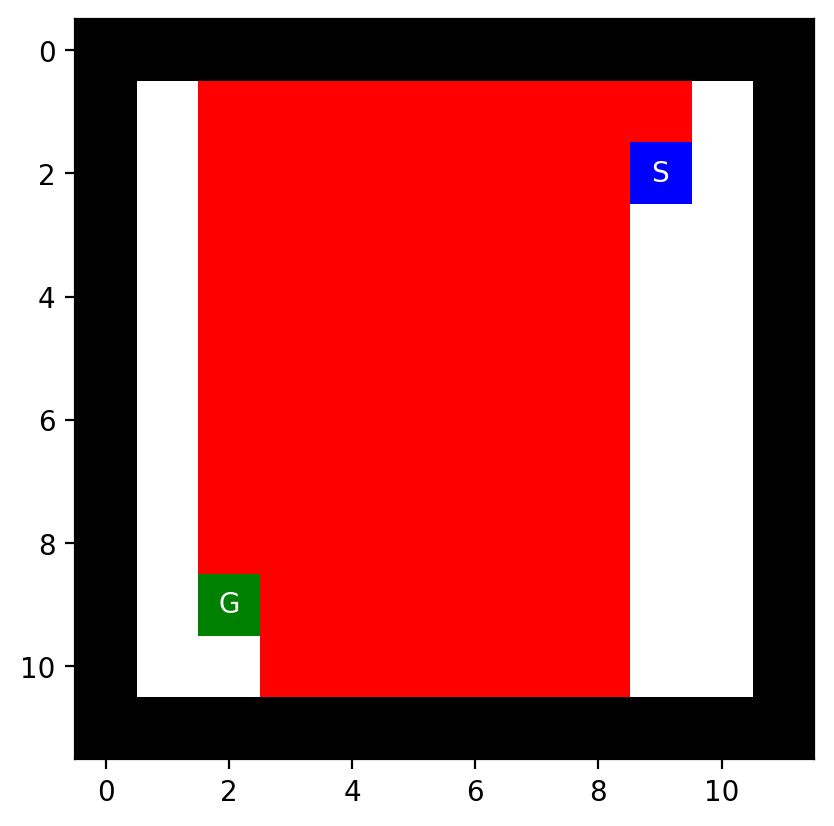

In [94]:
with open('empty_2_maze.txt', 'r') as f:
    maze_str = f.read()
    maze = mh.parse_maze(maze_str)

result_node, nodes_expanded, max_tree_depth, max_nodes_in_memory, max_frontier_size = DFS(maze)
    
print(f"Found a path with cost:    {result_node.cost}")
print(f"Number of nodes expanded:  {nodes_expanded}")
print(f"Max tree depth:            {max_tree_depth}")
print(f"Max nodes in memory:       {max_nodes_in_memory}")
print(f"Max frontier size:         {max_frontier_size}")
visualize_path(maze, result_node)

How does BFS and DFS deal with loops (cycles)?

- BFS maintains a reached set of nodes (nodes already visited or are on the frontier) and checks this reached set before visiting a new node, allowing it to prevent loops. 

- DFS, on the other hand, doesn't maintain a reached set of visited nodes and can revisit nodes and/or get caught in infinite loops. This is what it seemed like was happening to me for the large open maze ('open_maze.txt')

**BFS:**
- Complete: yes because BFS will ultimately find the solution if it exists
- Optimal: yes becuase our movement cost is uniform across the maze (each move costs 1 unit)

**DFS:**
- Complete: no because DFS has the potential to get stuck in loops and not find the/a solution
- Optimal: no because it could find a longer solution than the optimal one (or no solution at all)

Are your implementations complete and optimal? Explain why. What is the time and space complexity of each of **your** implementations?

**BFS:**
- I think the BFS solution is complete (it always found a solution) but they are not optimal as it searched nearly every square in each maze.

**DFS:**
- This was not complete and not optimal. For the iterations that did not get stuck in infinite loops, DFS still took a very long time to find a solution.

## Task 3: Informed search: Implement greedy best-first search and A* search  [20 Points]

You can use the map to estimate the distance from your current position to the goal using the Manhattan distance (see https://en.wikipedia.org/wiki/Taxicab_geometry) as a heuristic function. Both algorithms are based on Best-First search which requires only a small change from the BFS algorithm you have already implemented (see textbook/slides). 

In [119]:
# #Pseudocode from textbook (for reference)
#
# #GBFS:
# function GBFS(problem, f) returns a solution node or failure #note: 'f' is a heuristic function 'h(n)'
#     node <-- NODE(STATE=problem.INITIAL)
#     frontier <-- a priority queue ordered by f, with node as an element
#     reached <-- a lookup table, with one entry with key problem.INITIAL and value node
#     while not IS-EMPTY(frontier) do
#         node <-- POP(frontier)
#         if problem.IS-GOAL(node.STATE) then return node
#         for each child in EXPAND(problem, node) do
#             s <-- child.STATE
#             if s is not in reached or child.PATH-COST < reached[s].PATH-COST then
#                 reached[s] <-- child
#                 add child to frontier
#     return failure

# #A*
# function A*(problem, f) returns a solution node or failure #note: path cost to n + heuristic from n to goal = estimate of the total cost... g(n) + h(n)
#     node <-- NODE(STATE=problem.INITIAL)
#     frontier <-- a priority queue ordered by f, with node as an element
#     reached <-- a lookup table, with one entry with key problem.INITIAL and value node
#     while not IS-EMPTY(frontier) do
#         node <-- POP(frontier)
#         if problem.IS-GOAL(node.STATE) then return node
#         for each child in EXPAND(problem, node) do
#             s <-- child.STATE
#             if s is not in reached or child.PATH-COST < reached[s].PATH-COST then
#                 reached[s] <-- child
#                 add child to frontier
#     return failure

In [28]:
# Manhattan as the heuristic
def heuristic(pos, goal):
    return abs(pos[0] - goal[0]) + abs(pos[1] - goal[1])

In [97]:
def GBFS(maze):
    start = mh.find_pos(maze, what="S")
    goal = mh.find_pos(maze, what="G")
    
    counter = 0  # For tie-breaking
    
    # Metrics tracking
    nodes_expanded = 0
    max_tree_depth = 0
    max_nodes_in_memory = 0
    max_frontier_size = 0
    
    frontier = [(heuristic(start, goal), counter, Node(pos=start, parent=None, action=None, cost=0))]  # (priority, counter, Node)
    explored = set()

    while frontier:
        _, _, current_node = heapq.heappop(frontier)
        
        nodes_expanded += 1
        max_tree_depth = max(max_tree_depth, current_node.cost)
        
        if current_node.pos in explored:
            continue

        if current_node.pos == goal:
            max_nodes_in_memory = max(max_nodes_in_memory, len(frontier) + len(explored))
            return current_node, nodes_expanded, max_tree_depth, max_nodes_in_memory, max_frontier_size

        explored.add(current_node.pos)

        for action in random.sample(possible_actions(maze, current_node.pos), len(possible_actions(maze, current_node.pos))):
            child_pos = result(current_node.pos, action)
            if child_pos not in explored:
                child = Node(child_pos, current_node, action, current_node.cost + 1)
                counter -= 1
                heapq.heappush(frontier, (heuristic(child_pos, goal), counter, child))

        # Update max metrics after each iteration
        max_nodes_in_memory = max(max_nodes_in_memory, len(frontier) + len(explored))
        
        # Update max frontier size after considering all children of the current node
        max_frontier_size = max(max_frontier_size, len(frontier))
                
    # If we exit the loop without finding a goal, we return None for the result node and the metrics.
    return None, nodes_expanded, max_tree_depth, max_nodes_in_memory, len(frontier)


In [99]:
def A_star(maze):
    start = mh.find_pos(maze, what="S")
    goal = mh.find_pos(maze, what="G")
    counter = 0  # For tie-breaking

    # Metrics tracking
    nodes_expanded = 0
    max_tree_depth = 0
    max_nodes_in_memory = 0
    max_frontier_size = 0
    
    frontier = [(heuristic(start, goal) + 0, counter, Node(pos=start, parent=None, action=None, cost=0))]  # (priority, counter, Node)
    g_values = {start: 0}  # stores the lowest cost to reach each node

    while frontier:
        _, _, current_node = heapq.heappop(frontier)

        nodes_expanded += 1
        max_tree_depth = max(max_tree_depth, current_node.cost)
        
        if current_node.pos == goal:
            max_nodes_in_memory = max(max_nodes_in_memory, len(frontier) + len(g_values))
            return current_node, nodes_expanded, max_tree_depth, max_nodes_in_memory, max_frontier_size

        for action in random.sample(possible_actions(maze, current_node.pos), len(possible_actions(maze, current_node.pos))):
            child_pos = result(current_node.pos, action)
            new_g = current_node.cost + 1

            if child_pos not in g_values or new_g < g_values[child_pos]:
                g_values[child_pos] = new_g
                f_value = new_g + heuristic(child_pos, goal)
                child = Node(child_pos, current_node, action, new_g)
                counter -= 1
                heapq.heappush(frontier, (f_value, counter, child))

        # Update max metrics after each iteration
        max_nodes_in_memory = max(max_nodes_in_memory, len(frontier) + len(g_values))
        
        # Update max frontier size after considering all children of the current node
        max_frontier_size = max(max_frontier_size, len(frontier))
                
    # If we exit the loop without finding a goal, we return None for the result node and the metrics.
    return None, nodes_expanded, max_tree_depth, max_nodes_in_memory, len(frontier)


### Small Maze (GBFS / A-Star)

#### GBFS

Found a path with cost:    29
Number of nodes expanded:  40
Max tree depth:            29
Max nodes in memory:       44
Max frontier size:         5


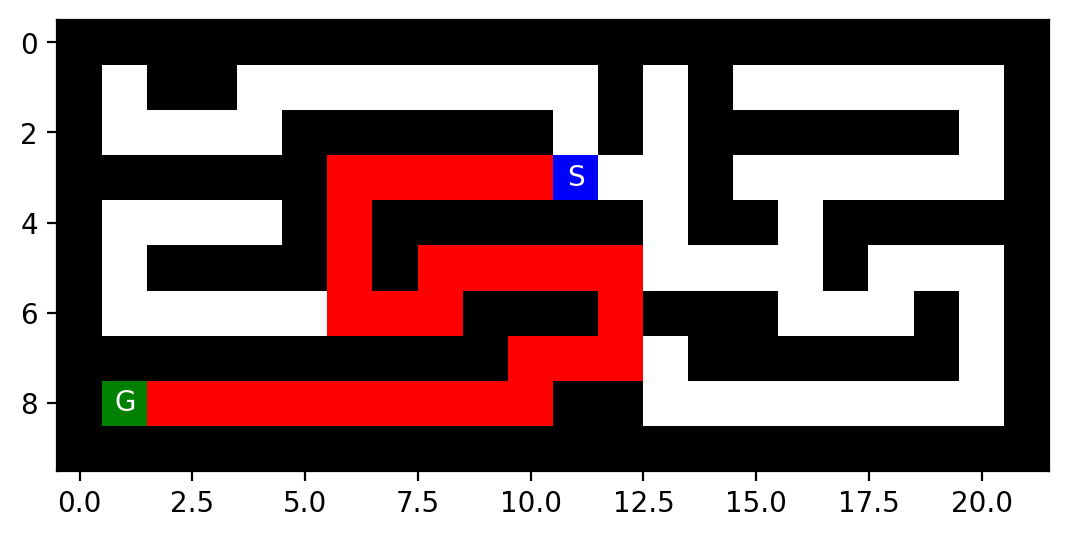

In [98]:
with open('small_maze.txt', 'r') as f:
    maze_str = f.read()
    maze = mh.parse_maze(maze_str)

result_node, nodes_expanded, max_tree_depth, max_nodes_in_memory, max_frontier_size = GBFS(maze)
    
print(f"Found a path with cost:    {result_node.cost}")
print(f"Number of nodes expanded:  {nodes_expanded}")
print(f"Max tree depth:            {max_tree_depth}")
print(f"Max nodes in memory:       {max_nodes_in_memory}")
print(f"Max frontier size:         {max_frontier_size}")
visualize_path(maze, result_node)

#### A*

Found a path with cost:    19
Number of nodes expanded:  52
Max tree depth:            19
Max nodes in memory:       65
Max frontier size:         7


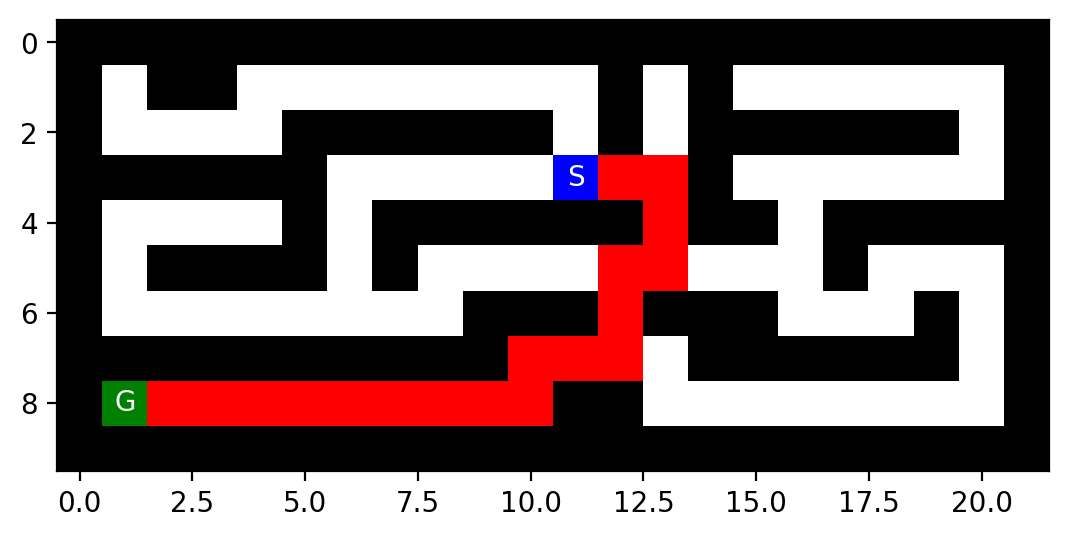

In [100]:
with open('small_maze.txt', 'r') as f:
    maze_str = f.read()
    maze = mh.parse_maze(maze_str)

result_node, nodes_expanded, max_tree_depth, max_nodes_in_memory, max_frontier_size = A_star(maze)
    
print(f"Found a path with cost:    {result_node.cost}")
print(f"Number of nodes expanded:  {nodes_expanded}")
print(f"Max tree depth:            {max_tree_depth}")
print(f"Max nodes in memory:       {max_nodes_in_memory}")
print(f"Max frontier size:         {max_frontier_size}")
visualize_path(maze, result_node)

### Medium Maze (GBFS / A-Star)

#### GBFS

Found a path with cost:    76
Number of nodes expanded:  80
Max tree depth:            76
Max nodes in memory:       82
Max frontier size:         4


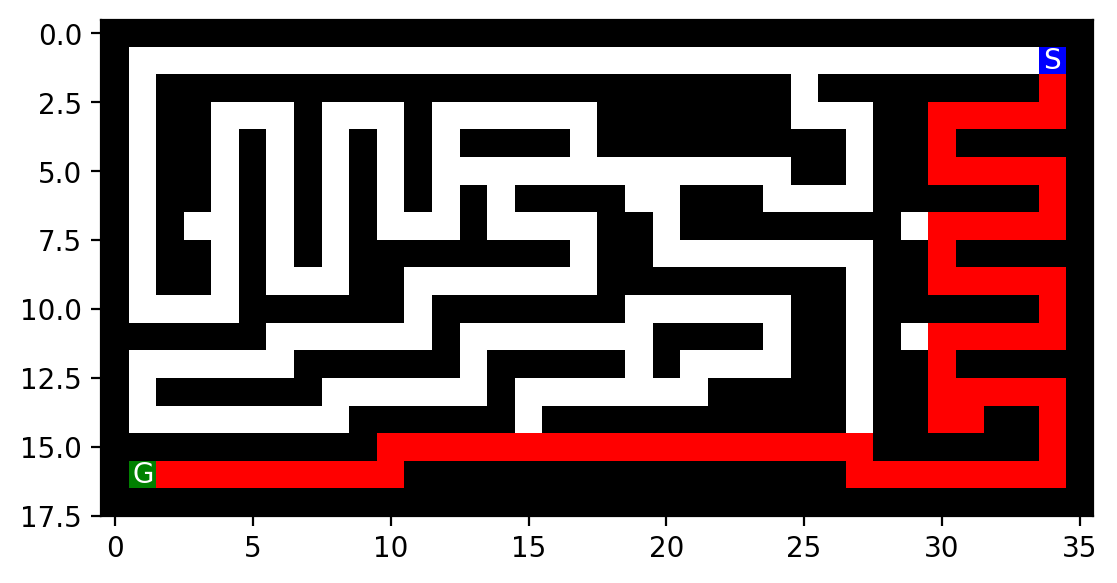

In [101]:
with open('medium_maze.txt', 'r') as f:
    maze_str = f.read()
    maze = mh.parse_maze(maze_str)

result_node, nodes_expanded, max_tree_depth, max_nodes_in_memory, max_frontier_size = GBFS(maze)
    
print(f"Found a path with cost:    {result_node.cost}")
print(f"Number of nodes expanded:  {nodes_expanded}")
print(f"Max tree depth:            {max_tree_depth}")
print(f"Max nodes in memory:       {max_nodes_in_memory}")
print(f"Max frontier size:         {max_frontier_size}")
visualize_path(maze, result_node)

#### A*

Found a path with cost:    68
Number of nodes expanded:  219
Max tree depth:            68
Max nodes in memory:       232
Max frontier size:         8


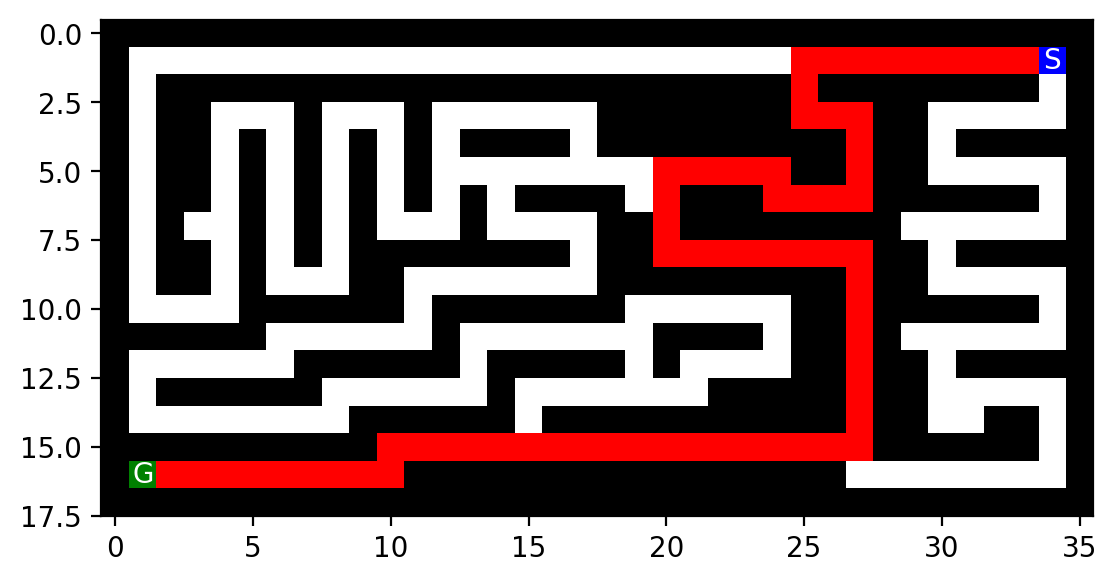

In [103]:
with open('medium_maze.txt', 'r') as f:
    maze_str = f.read()
    maze = mh.parse_maze(maze_str)

result_node, nodes_expanded, max_tree_depth, max_nodes_in_memory, max_frontier_size = A_star(maze)
    
print(f"Found a path with cost:    {result_node.cost}")
print(f"Number of nodes expanded:  {nodes_expanded}")
print(f"Max tree depth:            {max_tree_depth}")
print(f"Max nodes in memory:       {max_nodes_in_memory}")
print(f"Max frontier size:         {max_frontier_size}")
visualize_path(maze, result_node)

### Large Maze (GBFS / A-Star)

#### GBFS

Found a path with cost:    210
Number of nodes expanded:  468
Max tree depth:            210
Max nodes in memory:       489
Max frontier size:         22


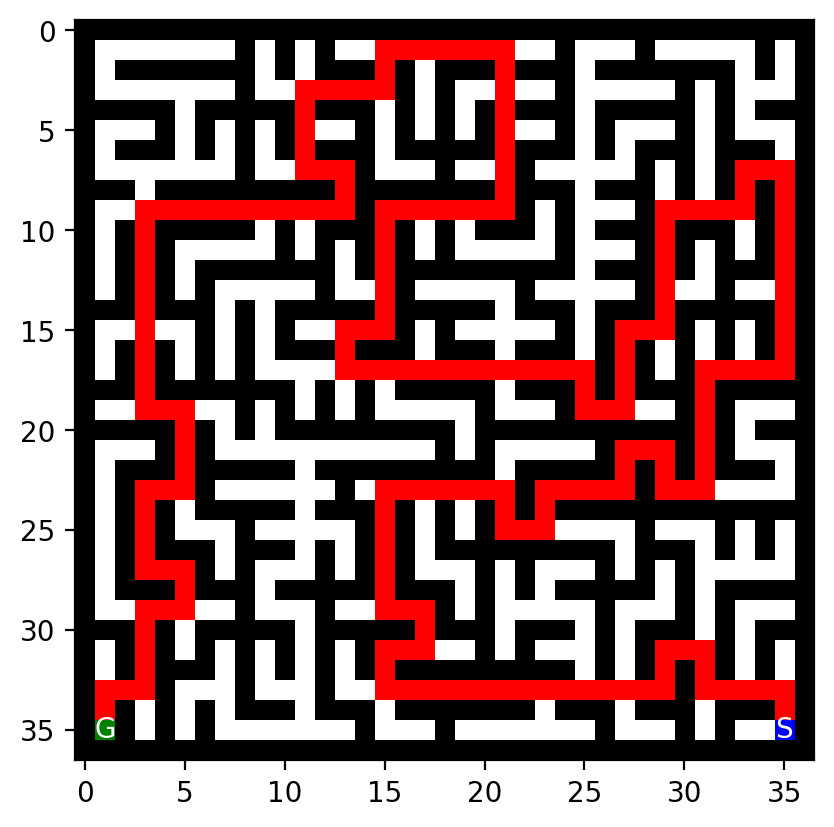

In [104]:
with open('large_maze.txt', 'r') as f:
    maze_str = f.read()
    maze = mh.parse_maze(maze_str)

result_node, nodes_expanded, max_tree_depth, max_nodes_in_memory, max_frontier_size = GBFS(maze)
    
print(f"Found a path with cost:    {result_node.cost}")
print(f"Number of nodes expanded:  {nodes_expanded}")
print(f"Max tree depth:            {max_tree_depth}")
print(f"Max nodes in memory:       {max_nodes_in_memory}")
print(f"Max frontier size:         {max_frontier_size}")
visualize_path(maze, result_node)

#### A*

Found a path with cost:    210
Number of nodes expanded:  550
Max tree depth:            210
Max nodes in memory:       565
Max frontier size:         12


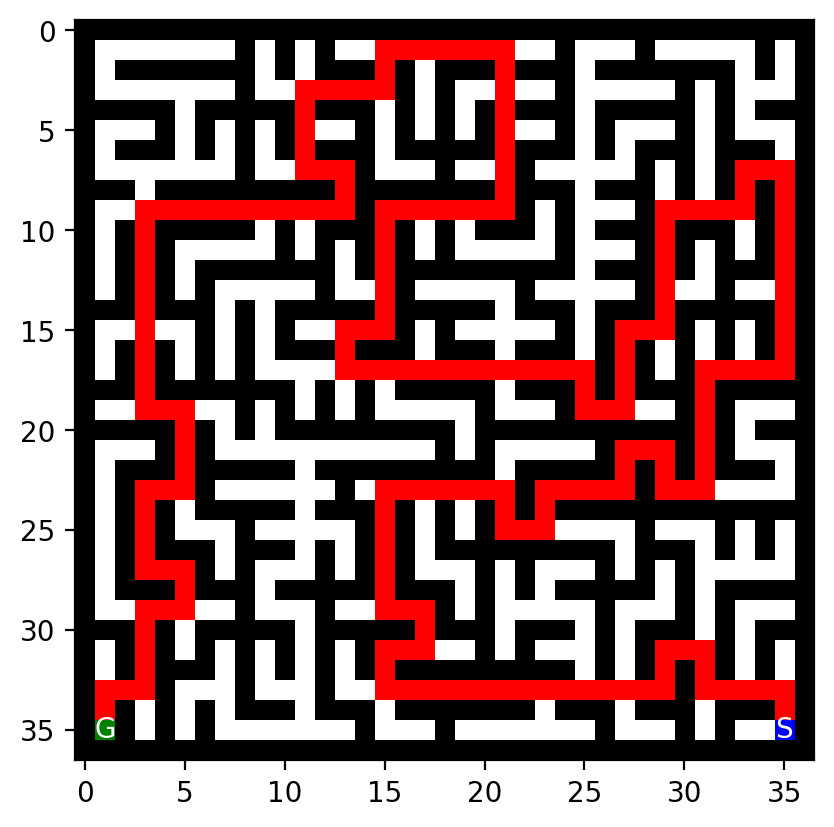

In [105]:
with open('large_maze.txt', 'r') as f:
    maze_str = f.read()
    maze = mh.parse_maze(maze_str)

result_node, nodes_expanded, max_tree_depth, max_nodes_in_memory, max_frontier_size = A_star(maze)
    
print(f"Found a path with cost:    {result_node.cost}")
print(f"Number of nodes expanded:  {nodes_expanded}")
print(f"Max tree depth:            {max_tree_depth}")
print(f"Max nodes in memory:       {max_nodes_in_memory}")
print(f"Max frontier size:         {max_frontier_size}")
visualize_path(maze, result_node)

### Open Maze (GBFS / A-Star)

#### GBFS

Found a path with cost:    64
Number of nodes expanded:  107
Max tree depth:            64
Max nodes in memory:       186
Max frontier size:         98


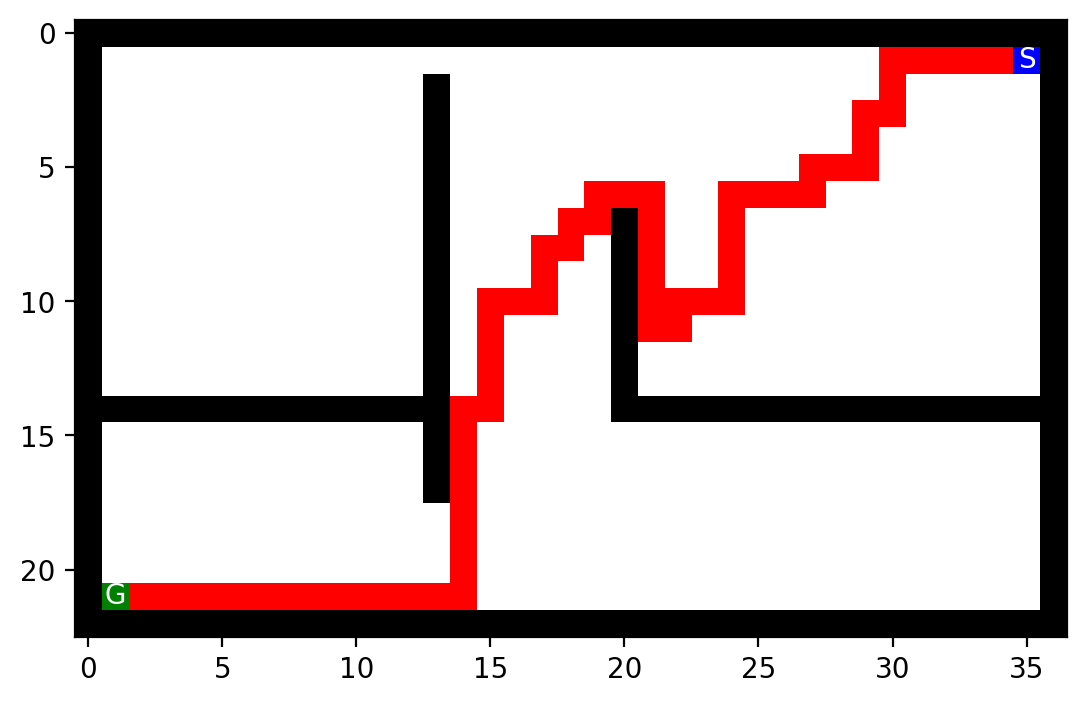

In [106]:
with open('open_maze.txt', 'r') as f:
    maze_str = f.read()
    maze = mh.parse_maze(maze_str)

result_node, nodes_expanded, max_tree_depth, max_nodes_in_memory, max_frontier_size = GBFS(maze)
    
print(f"Found a path with cost:    {result_node.cost}")
print(f"Number of nodes expanded:  {nodes_expanded}")
print(f"Max tree depth:            {max_tree_depth}")
print(f"Max nodes in memory:       {max_nodes_in_memory}")
print(f"Max frontier size:         {max_frontier_size}")
visualize_path(maze, result_node)

#### A*

Found a path with cost:    54
Number of nodes expanded:  97
Max tree depth:            54
Max nodes in memory:       263
Max frontier size:         96


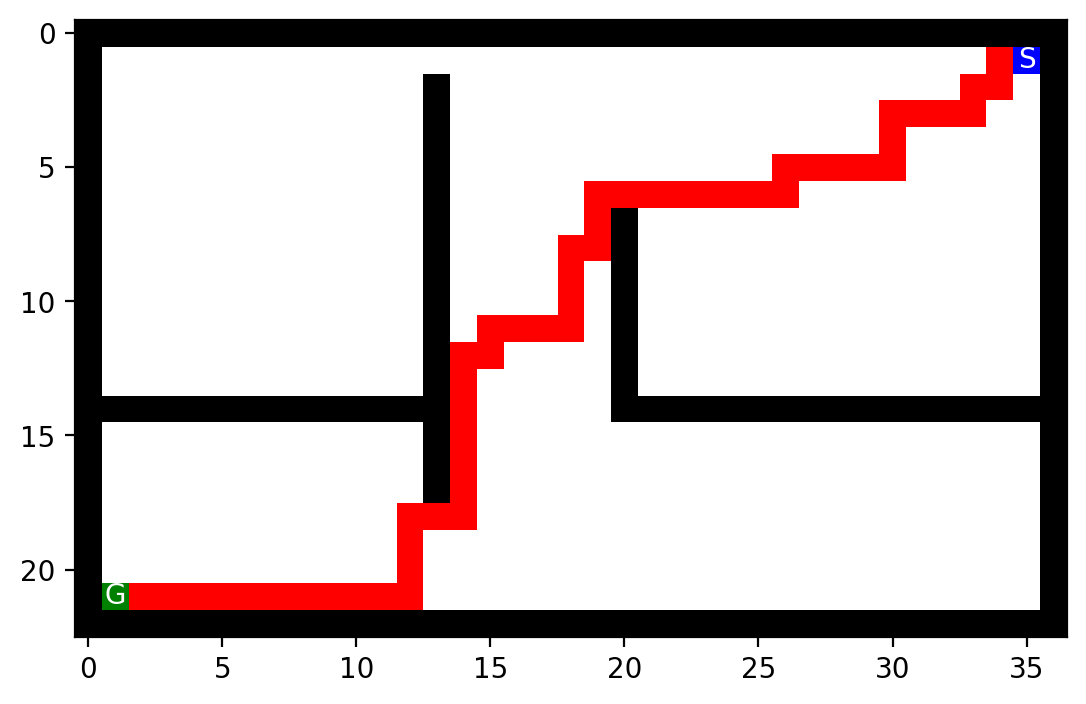

In [108]:
with open('open_maze.txt', 'r') as f:
    maze_str = f.read()
    maze = mh.parse_maze(maze_str)

result_node, nodes_expanded, max_tree_depth, max_nodes_in_memory, max_frontier_size = A_star(maze)
    
print(f"Found a path with cost:    {result_node.cost}")
print(f"Number of nodes expanded:  {nodes_expanded}")
print(f"Max tree depth:            {max_tree_depth}")
print(f"Max nodes in memory:       {max_nodes_in_memory}")
print(f"Max frontier size:         {max_frontier_size}")
visualize_path(maze, result_node)

### Wall Maze (GBFS / A-Star)

#### GBFS

Found a path with cost:    14
Number of nodes expanded:  15
Max tree depth:            14
Max nodes in memory:       40
Max frontier size:         26


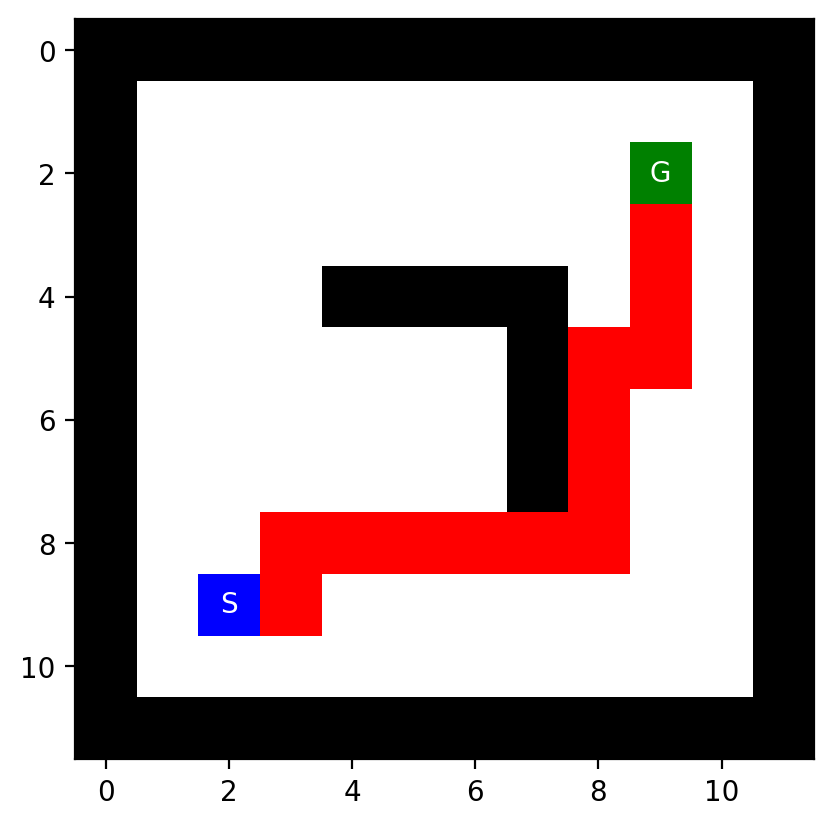

In [109]:
with open('wall_maze.txt', 'r') as f:
    maze_str = f.read()
    maze = mh.parse_maze(maze_str)

result_node, nodes_expanded, max_tree_depth, max_nodes_in_memory, max_frontier_size = GBFS(maze)
    
print(f"Found a path with cost:    {result_node.cost}")
print(f"Number of nodes expanded:  {nodes_expanded}")
print(f"Max tree depth:            {max_tree_depth}")
print(f"Max nodes in memory:       {max_nodes_in_memory}")
print(f"Max frontier size:         {max_frontier_size}")
visualize_path(maze, result_node)

#### A*

Found a path with cost:    14
Number of nodes expanded:  24
Max tree depth:            14
Max nodes in memory:       74
Max frontier size:         27


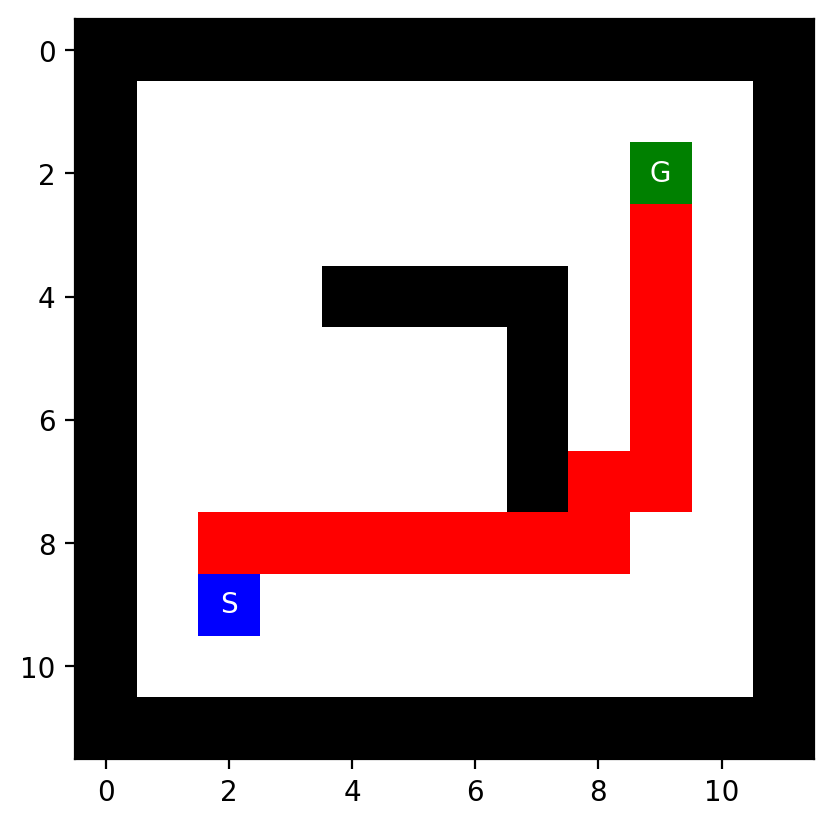

In [111]:
with open('wall_maze.txt', 'r') as f:
    maze_str = f.read()
    maze = mh.parse_maze(maze_str)

result_node, nodes_expanded, max_tree_depth, max_nodes_in_memory, max_frontier_size = A_star(maze)
    
print(f"Found a path with cost:    {result_node.cost}")
print(f"Number of nodes expanded:  {nodes_expanded}")
print(f"Max tree depth:            {max_tree_depth}")
print(f"Max nodes in memory:       {max_nodes_in_memory}")
print(f"Max frontier size:         {max_frontier_size}")
visualize_path(maze, result_node)

### Loops Maze (GBFS / A-Star)

#### GBFS

Found a path with cost:    23
Number of nodes expanded:  65
Max tree depth:            23
Max nodes in memory:       62
Max frontier size:         14


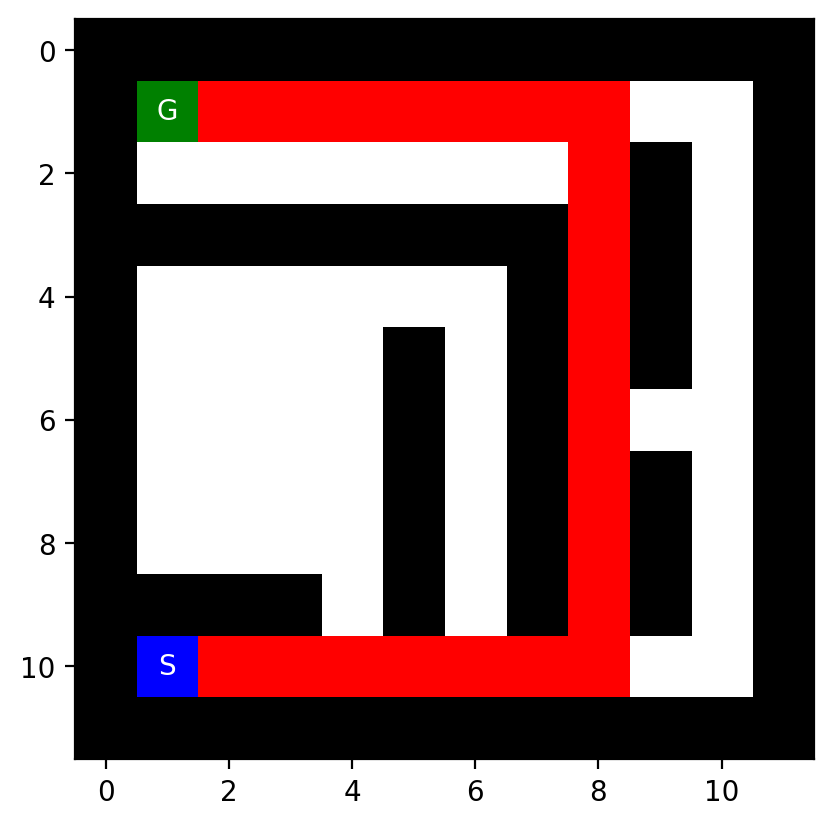

In [112]:
with open('loops_maze.txt', 'r') as f:
    maze_str = f.read()
    maze = mh.parse_maze(maze_str)

result_node, nodes_expanded, max_tree_depth, max_nodes_in_memory, max_frontier_size = GBFS(maze)
    
print(f"Found a path with cost:    {result_node.cost}")
print(f"Number of nodes expanded:  {nodes_expanded}")
print(f"Max tree depth:            {max_tree_depth}")
print(f"Max nodes in memory:       {max_nodes_in_memory}")
print(f"Max frontier size:         {max_frontier_size}")
visualize_path(maze, result_node)

#### A*

Found a path with cost:    23
Number of nodes expanded:  58
Max tree depth:            23
Max nodes in memory:       71
Max frontier size:         10


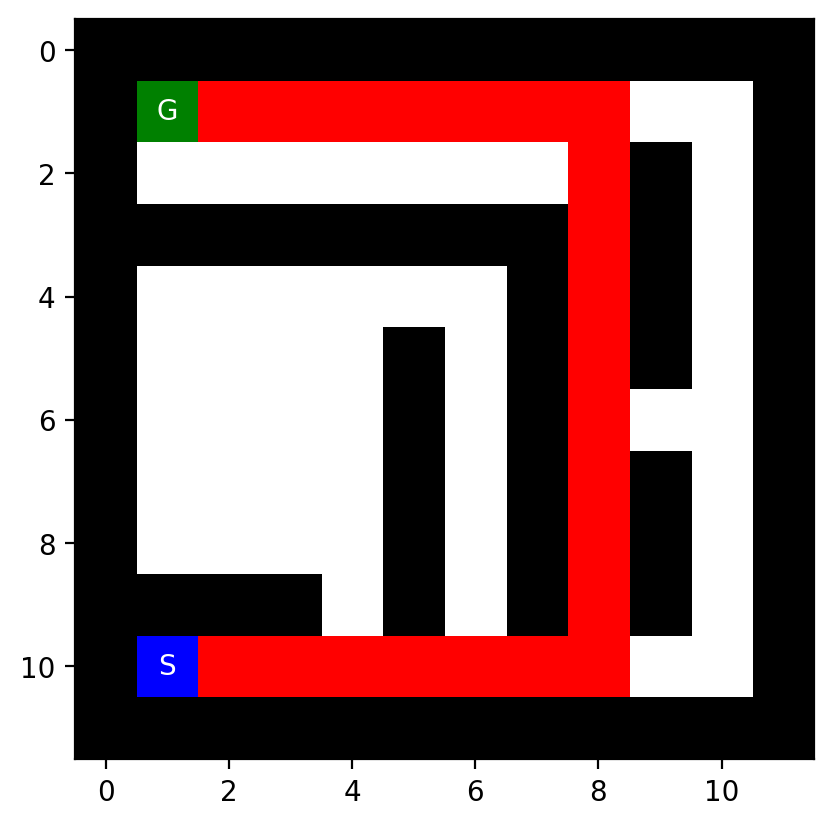

In [113]:
with open('loops_maze.txt', 'r') as f:
    maze_str = f.read()
    maze = mh.parse_maze(maze_str)

result_node, nodes_expanded, max_tree_depth, max_nodes_in_memory, max_frontier_size = A_star(maze)
    
print(f"Found a path with cost:    {result_node.cost}")
print(f"Number of nodes expanded:  {nodes_expanded}")
print(f"Max tree depth:            {max_tree_depth}")
print(f"Max nodes in memory:       {max_nodes_in_memory}")
print(f"Max frontier size:         {max_frontier_size}")
visualize_path(maze, result_node)

### Empty Maze (GBFS / A-Star)

#### GBFS

Found a path with cost:    14
Number of nodes expanded:  15
Max tree depth:            14
Max nodes in memory:       44
Max frontier size:         30


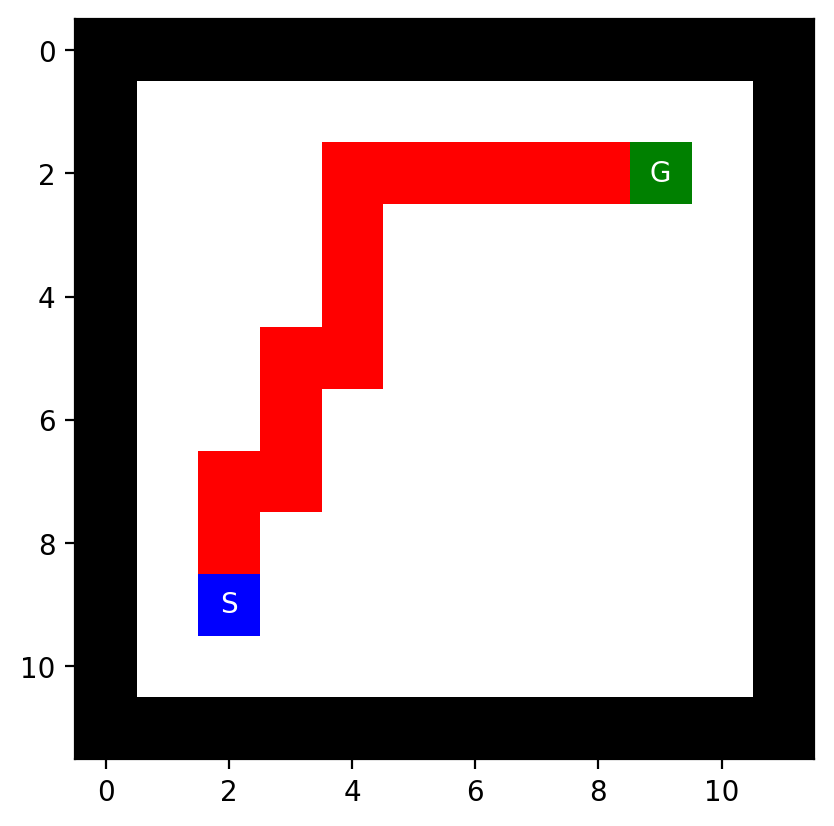

In [114]:
with open('empty_maze.txt', 'r') as f:
    maze_str = f.read()
    maze = mh.parse_maze(maze_str)

result_node, nodes_expanded, max_tree_depth, max_nodes_in_memory, max_frontier_size = GBFS(maze)
    
print(f"Found a path with cost:    {result_node.cost}")
print(f"Number of nodes expanded:  {nodes_expanded}")
print(f"Max tree depth:            {max_tree_depth}")
print(f"Max nodes in memory:       {max_nodes_in_memory}")
print(f"Max frontier size:         {max_frontier_size}")
visualize_path(maze, result_node)

#### A*

Found a path with cost:    14
Number of nodes expanded:  15
Max tree depth:            14
Max nodes in memory:       58
Max frontier size:         22


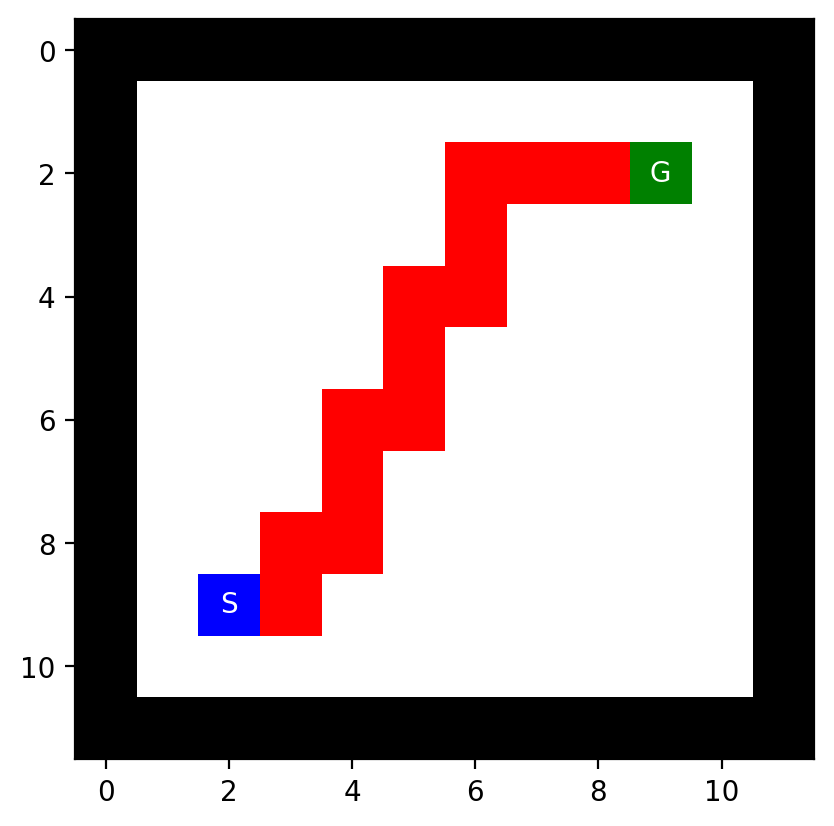

In [115]:
with open('empty_maze.txt', 'r') as f:
    maze_str = f.read()
    maze = mh.parse_maze(maze_str)

result_node, nodes_expanded, max_tree_depth, max_nodes_in_memory, max_frontier_size = A_star(maze)
    
print(f"Found a path with cost:    {result_node.cost}")
print(f"Number of nodes expanded:  {nodes_expanded}")
print(f"Max tree depth:            {max_tree_depth}")
print(f"Max nodes in memory:       {max_nodes_in_memory}")
print(f"Max frontier size:         {max_frontier_size}")
visualize_path(maze, result_node)

### Empty Maze 2 (GBFS / A-Star)

#### GBFS

Found a path with cost:    14
Number of nodes expanded:  15
Max tree depth:            14
Max nodes in memory:       44
Max frontier size:         30


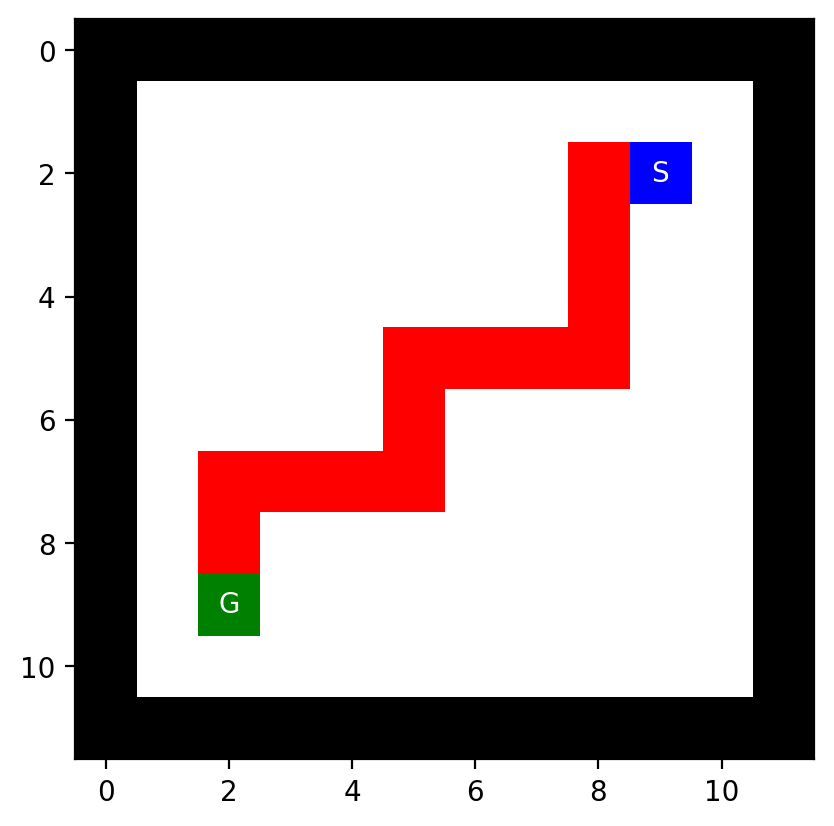

In [116]:
with open('empty_2_maze.txt', 'r') as f:
    maze_str = f.read()
    maze = mh.parse_maze(maze_str)

result_node, nodes_expanded, max_tree_depth, max_nodes_in_memory, max_frontier_size = GBFS(maze)
    
print(f"Found a path with cost:    {result_node.cost}")
print(f"Number of nodes expanded:  {nodes_expanded}")
print(f"Max tree depth:            {max_tree_depth}")
print(f"Max nodes in memory:       {max_nodes_in_memory}")
print(f"Max frontier size:         {max_frontier_size}")
visualize_path(maze, result_node)

#### A*

Found a path with cost:    14
Number of nodes expanded:  15
Max tree depth:            14
Max nodes in memory:       54
Max frontier size:         20


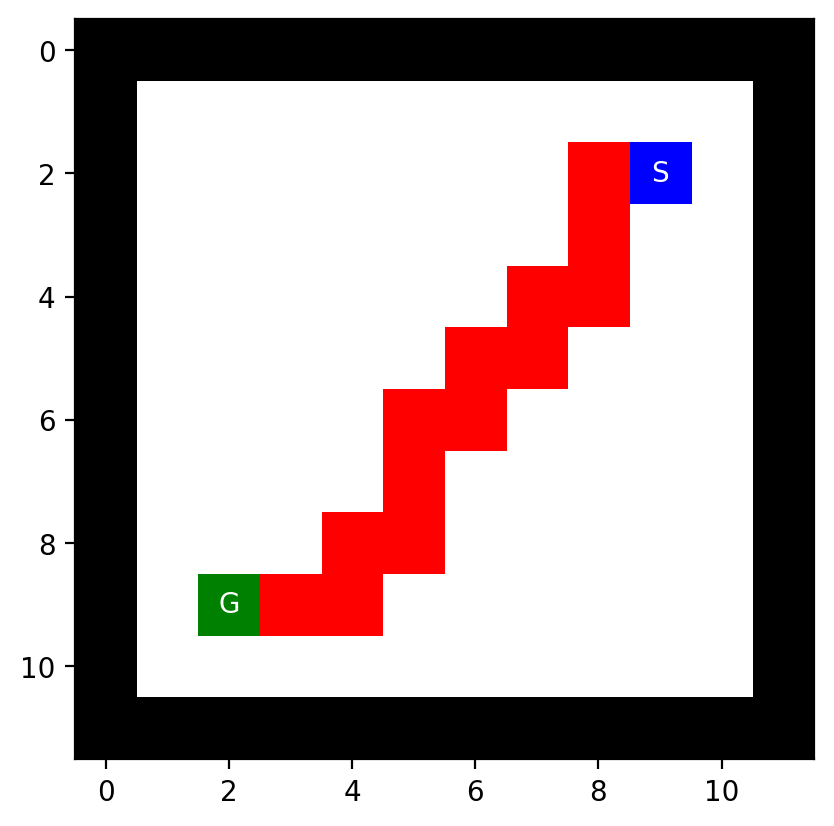

In [117]:
with open('empty_2_maze.txt', 'r') as f:
    maze_str = f.read()
    maze = mh.parse_maze(maze_str)

result_node, nodes_expanded, max_tree_depth, max_nodes_in_memory, max_frontier_size = A_star(maze)
    
print(f"Found a path with cost:    {result_node.cost}")
print(f"Number of nodes expanded:  {nodes_expanded}")
print(f"Max tree depth:            {max_tree_depth}")
print(f"Max nodes in memory:       {max_nodes_in_memory}")
print(f"Max frontier size:         {max_frontier_size}")
visualize_path(maze, result_node)

Are your implementations complete and optimal? What is the time and space complexity?

**GBFS:**
- For each of these mazes, GBFS did find a semi-reasonable solution, meaning it was complete. However, it did not generally perform as well as A*, making it less optimal. 

**A-Star:**
- A-Star performed better than GBFS generally. It was complete because the cost was constant and the branching factor was finite. It was optimal because the manhattan heuristic was optimal.

## Task 4: Comparison and discussion [20 Points] 

Run experiments to compare the implemented algorithms.

How to deal with issues:

* Your implementation returns unexpected results: Try to debug and fix the code. Visualizing the maze, the current path and the frontier after every step is very helpful. If the code still does not work, then mark the result with an asterisk (*) and describe the issue below the table.

* Your implementation cannot consistently solve a specific maze and ends up in an infinite loop:
    Debug. If it is a shortcoming of the algorithm/implementation, then put "N/A*" in the results table and describe why this is happening.

Complete the following table for each maze.

__Small maze__

| algorithm | path cost | # of nodes expanded | max tree depth | max # of nodes in memory | max frontier size |
|-----------|-----------|----------------|----------------|---------------|-------------------|
| BFS       |19         |92              |19              |95             |8                  |
| DFS       |29         |54              |29              |29             |29                 |
| GBFS      |29         |40              |29              |44             |5                  |
| A*        |19         |52              |19              |65             |7                  |

__Medium maze__

| algorithm | path cost | # of nodes expanded | max tree depth | max # of nodes in memory | max frontier size |
|-----------|-----------|----------------|----------------|---------------|-------------------|
| BFS       |68         |270             |68              |275            |8                  |
| DFS       |164        |259             |164             |164            |164                |
| GBFS      |76         |80              |76              |82             |4                  |
| A*        |68         |219             |68              |232            |8                  |

__Large maze__

| algorithm | path cost | # of nodes expanded | max tree depth | max # of nodes in memory | max frontier size |
|-----------|-----------|----------------|----------------|---------------|-------------------|
| BFS       |210        |621             |210             |627            |8                  |
| DFS       |210        |470             |210             |210            |210                |
| GBFS      |210        |468             |210             |489            |22                 |
| A*        |210        |550             |210             |565            |12                 |

__Open maze__

| algorithm | path cost | # of nodes expanded | max tree depth | max # of nodes in memory | max frontier size |
|-----------|-----------|----------------|----------------|---------------|-------------------|
| BFS       |54         |683             |54              |687            |25                 |
| DFS       |N/A        |N/A             |N/A             |N/A            |N/A                |
| GBFS      |64         |107             |64              |186            |98                 |
| A*        |54         |97              |54              |263            |96                 |

__Wall maze__

| algorithm | path cost | # of nodes expanded | max tree depth | max # of nodes in memory | max frontier size |
|-----------|-----------|----------------|----------------|---------------|-------------------|
| BFS       |14         |89              |14              |95             |11                 |
| DFS       |60         |12,638          |72              |72             |72                 |
| GBFS      |14         |15              |14              |40             |26                 |
| A*        |14         |24              |14              |74             |27                 |

__Loops maze__

| algorithm | path cost | # of nodes expanded | max tree depth | max # of nodes in memory | max frontier size |
|-----------|-----------|----------------|----------------|---------------|-------------------|
| BFS       |23         |72              |23              |74             |8                  |
| DFS       |41         |1,180           |41              |41             |41                 |
| GBFS      |23         |65              |23              |62             |14                 |
| A*        |23         |58              |23              |71             |10                 |

__Empty maze__

| algorithm | path cost | # of nodes expanded | max tree depth | max # of nodes in memory | max frontier size |
|-----------|-----------|----------------|----------------|---------------|-------------------|
| BFS       |14         |96              |14              |102            |12                 |
| DFS       |88         |89              |88              |88             |88                 |
| GBFS      |14         |15              |14              |44             |30                 |
| A*        |14         |15              |14              |58             |22                 |

__Empty 2 maze__

| algorithm | path cost | # of nodes expanded | max tree depth | max # of nodes in memory | max frontier size |
|-----------|-----------|----------------|----------------|---------------|-------------------|
| BFS       |14         |96              |14              |102            |12                 |
| DFS       |70         |71              |70              |70             |70                 |
| GBFS      |14         |15              |14              |44             |30                 |
| A*        |14         |15              |14              |54             |20                 |


Present the results as using charts (see [Python Code Examples/charts and tables](../HOWTOs/charts_and_tables.ipynb)). 

### Manually converting the text table above to raw CSV text

__Small maze__
algorithm,path cost,# of nodes expanded,max tree depth,max # of nodes in memory,max frontier size
BFS,19,92,19,95,8
DFS,29,54,29,29,29
GBFS,29,40,29,44,5
A*,19,52,19,65,7

__Medium maze__
algorithm,path cost,# of nodes expanded,max tree depth,max # of nodes in memory,max frontier size
BFS,68,270,68,275,8
DFS,164,259,64,164,164
GBFS,76,80,76,82,4
A*,68,219,68,232,8

__Large maze__
algorithm,path cost,# of nodes expanded,max tree depth,max # of nodes in memory,max frontier size
BFS,210,621,210,627,8
DFS,210,470,210,210,210
GBFS,210,468,210,489,22
A*,210,550,210,565,12

__Open maze__
algorithm,path cost,# of nodes expanded,max tree depth,max # of nodes in memory,max frontier size
BFS,54,683,54,687,25
DFS,N/A,N/A,N/A,N/A,N/A
GBFS,64,107,64,186,98
A*,54,97,54,263,96

__Wall maze__
algorithm,path cost,# of nodes expanded,max tree depth,max # of nodes in memory,max frontier size
BFS,14,89,14,95,11
DFS,60,12638,72,72,72
GBFS,14,15,14,40,26
A*,14,24,14,74,27

__Loops maze__
algorithm,path cost,# of nodes expanded,max tree depth,max # of nodes in memory,max frontier size
BFS,23,72,23,74,8
DFS,41,1180,41,41,41
GBFS,23,65,23,62,14
A*,23,58,23,71,10

__Empty maze__
algorithm,path cost,# of nodes expanded,max tree depth,max # of nodes in memory,max frontier size
BFS,14,96,14,102,12
DFS,88,89,88,88,88
GBFS,14,15,14,44,30
A*,14,15,14,58,22

__Empty 2 maze__
algorithm,path cost,# of nodes expanded,max tree depth,max # of nodes in memory,max frontier size
BFS,14,96,14,102,12
DFS,70,71,70,70,70
GBFS,14,15,14,44,30
A*,14,15,14,54,20

### Using saved CSV files of each maze output to create Pandas DataFrames

In [138]:
csv_files = ['small.csv',
             'medium.csv',
             'large.csv',
             'open.csv',
             'wall.csv',
             'loops.csv', 
             'empty.csv',
             'empty2.csv'
]

In [207]:
dataframes = {}
for file in csv_files:
    df_name = file.split('.')[0]
    dataframes[df_name] = pd.read_csv(file)

# Example maze-specific df
dataframes['wall']

,algorithm,path cost,# of nodes expanded,max tree depth,max # of nodes in memory,max frontier size
0,BFS,14,89,14,95,11
1,DFS,60,12638,72,72,72
2,GBFS,14,15,14,40,26
3,A*,14,24,14,74,27


### Plotting the results from each maze

In [147]:
def plot_maze_data(maze_name, dataframes):
    df = dataframes[maze_name]
    melted_df = pd.melt(df, id_vars=['algorithm'], 
                        value_vars=[col for col in df.columns if col != 'algorithm'],
                        var_name='metric', value_name='value')

    # Plot using catplot for bar plots
    g = sns.catplot(data=melted_df, x='algorithm', y='value', hue='algorithm', col='metric', kind='bar', height=4, aspect=0.7)

    # Set the titles and remove x-axis labels
    g.set_axis_labels("", "Value")
    g.set_titles("{col_name}")
    g.set(xticklabels=[])  # This will remove x-axis labels
    g.fig.subplots_adjust(top=0.9)  # Adjust subplots for title space
    g.fig.suptitle(f'{maze_name.capitalize()} Maze', fontsize=16)

    g.add_legend()
    plt.tight_layout()
    plt.show()

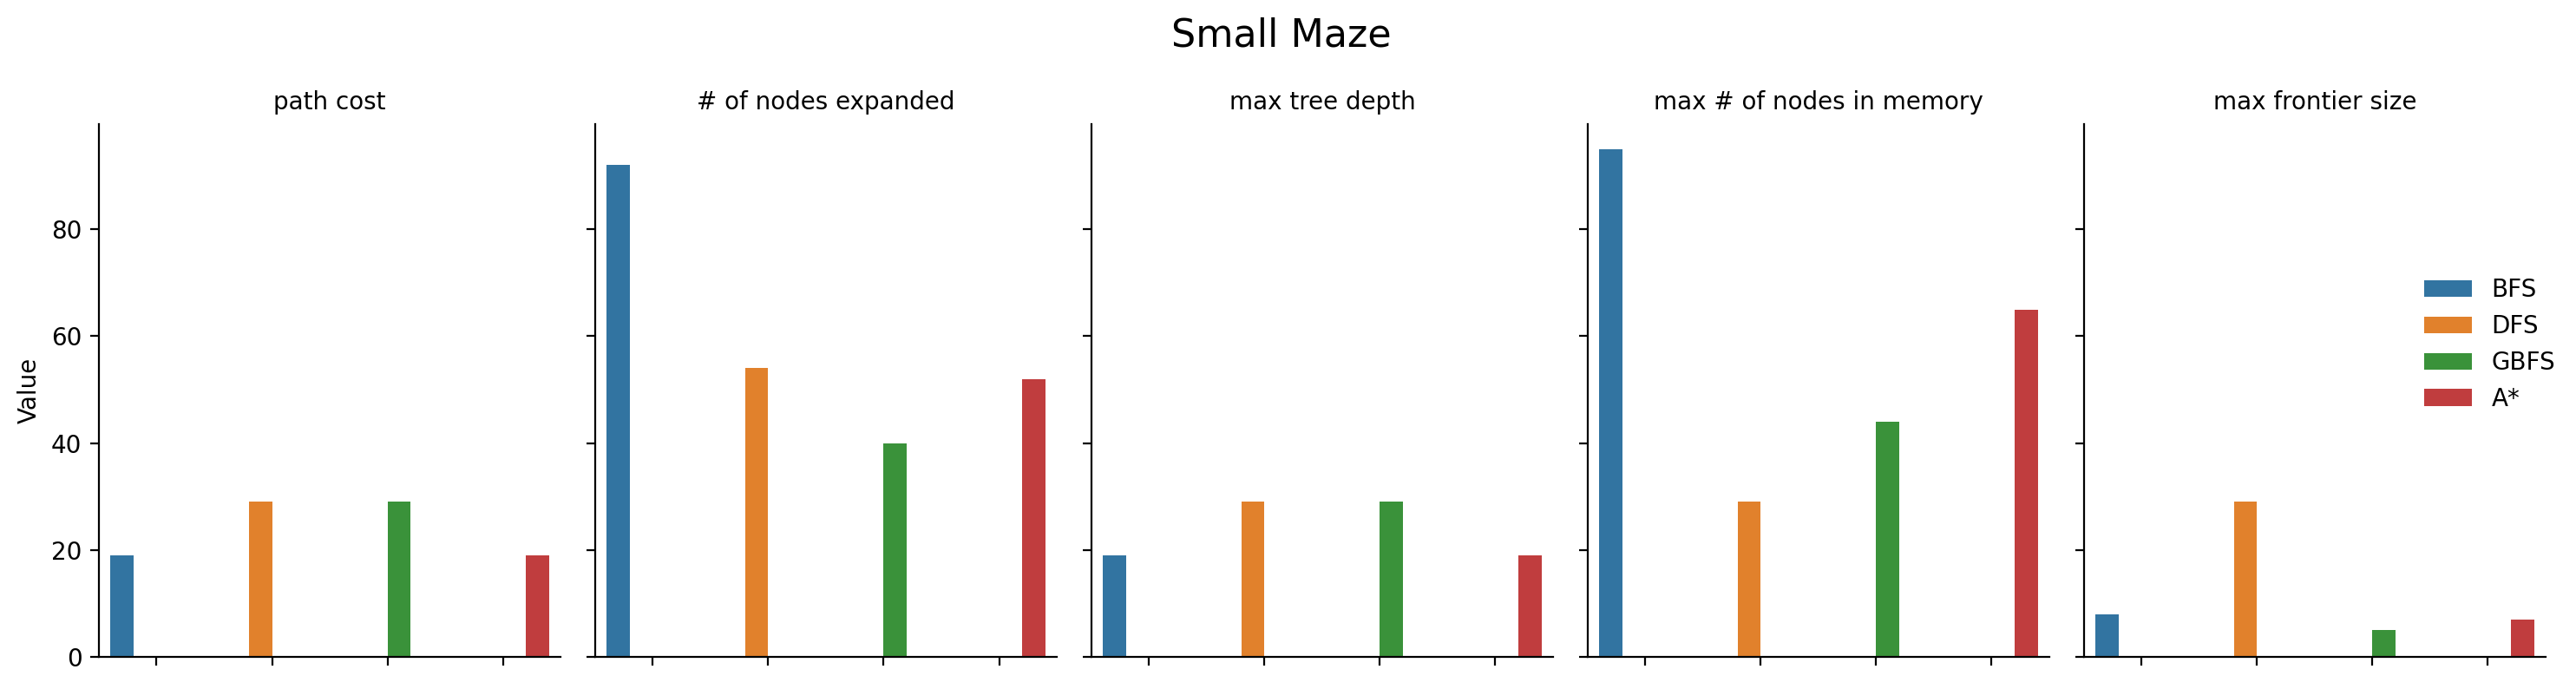

In [150]:
plot_maze_data('small', dataframes)

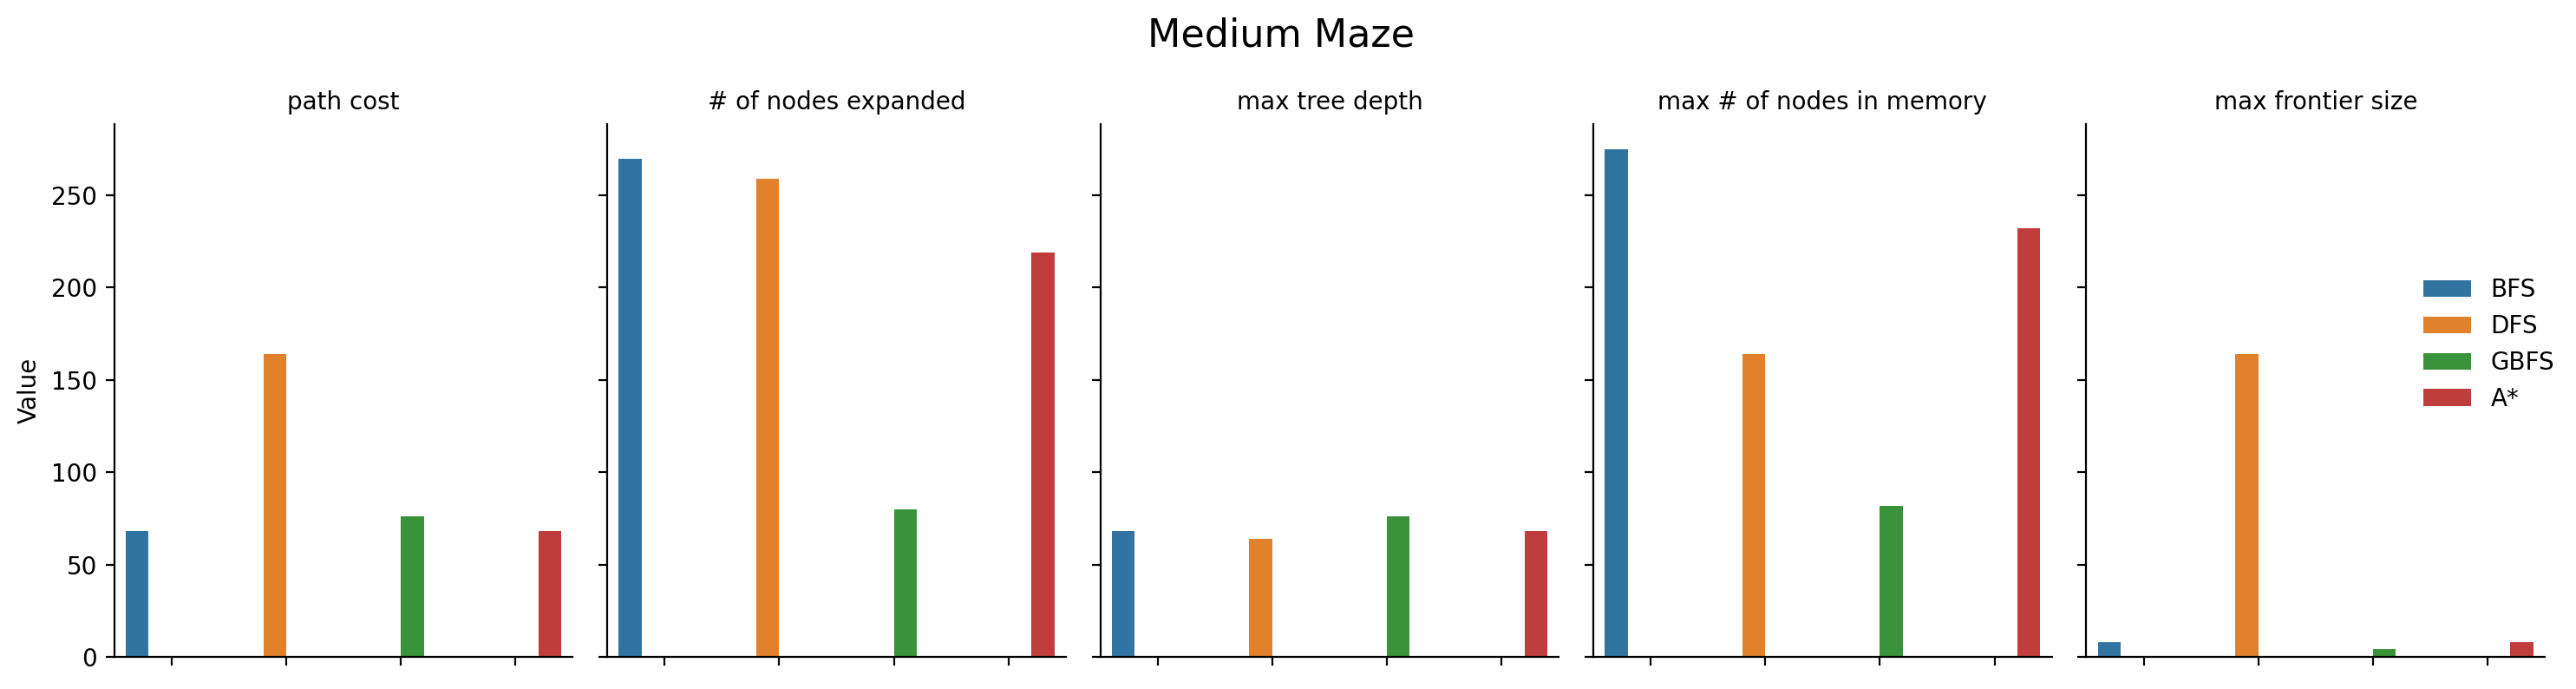

In [151]:
plot_maze_data('medium', dataframes)

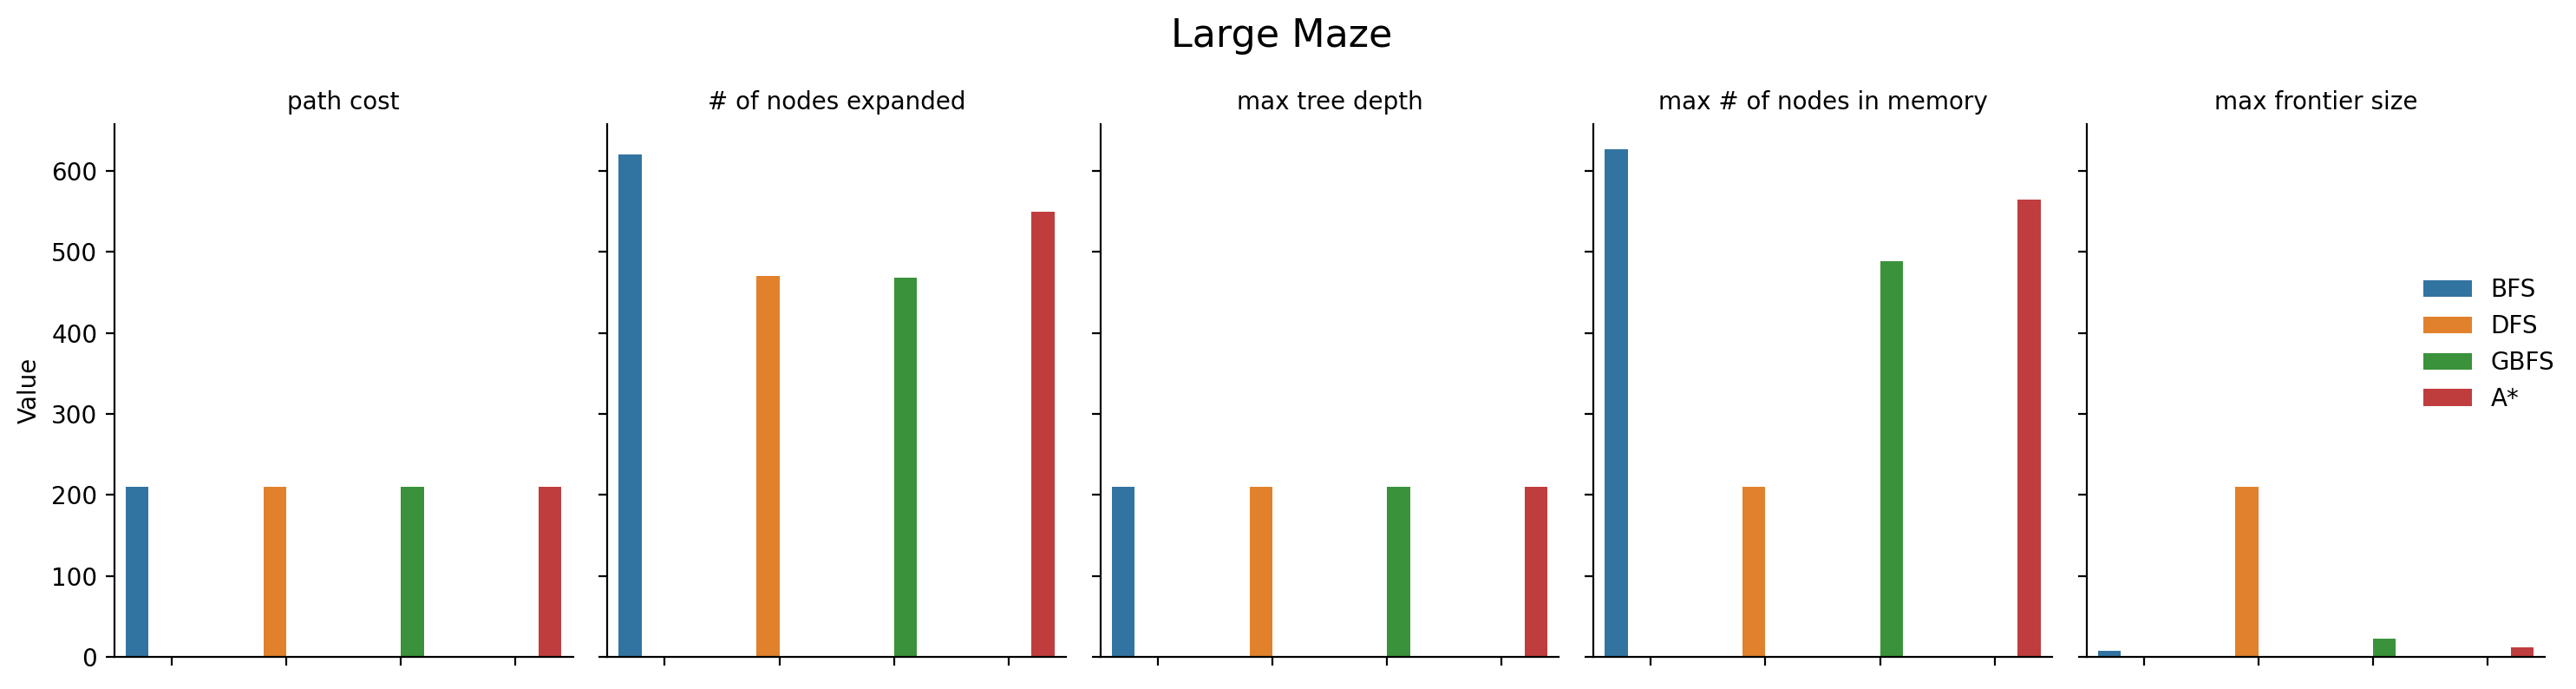

In [152]:
plot_maze_data('large', dataframes)

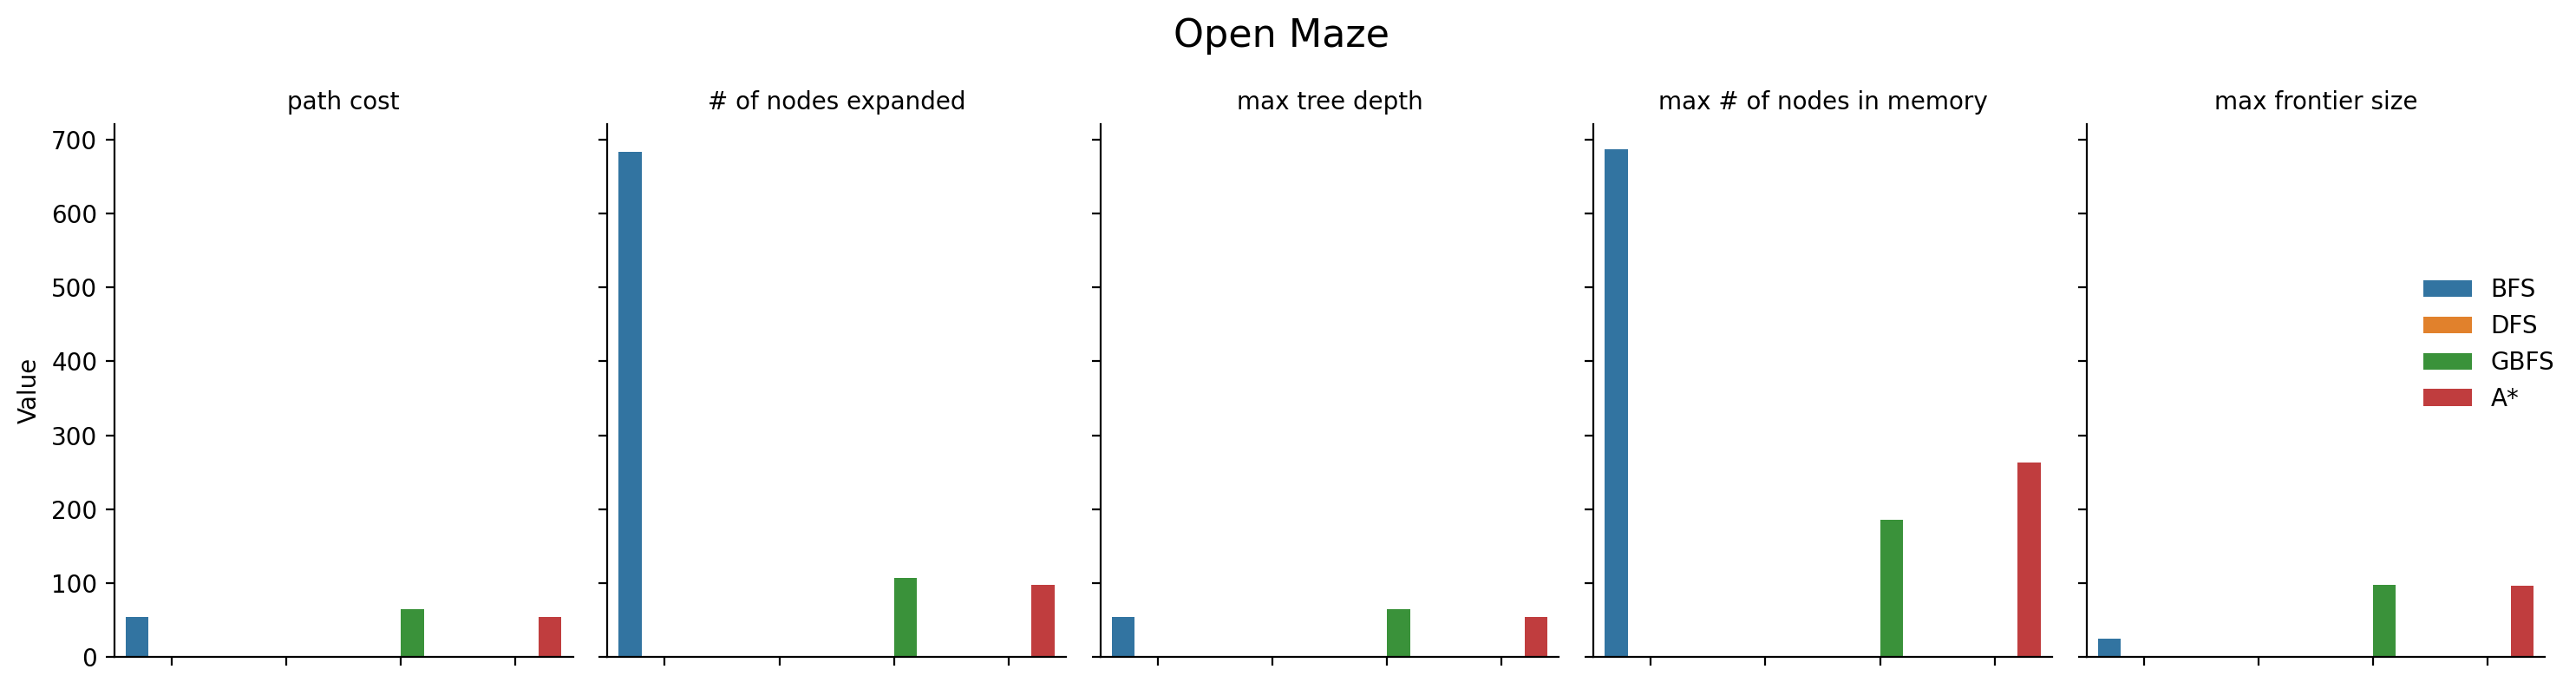

In [153]:
plot_maze_data('open', dataframes)

# Note: the DFS algorithm never found a solution and was stuck in a loop

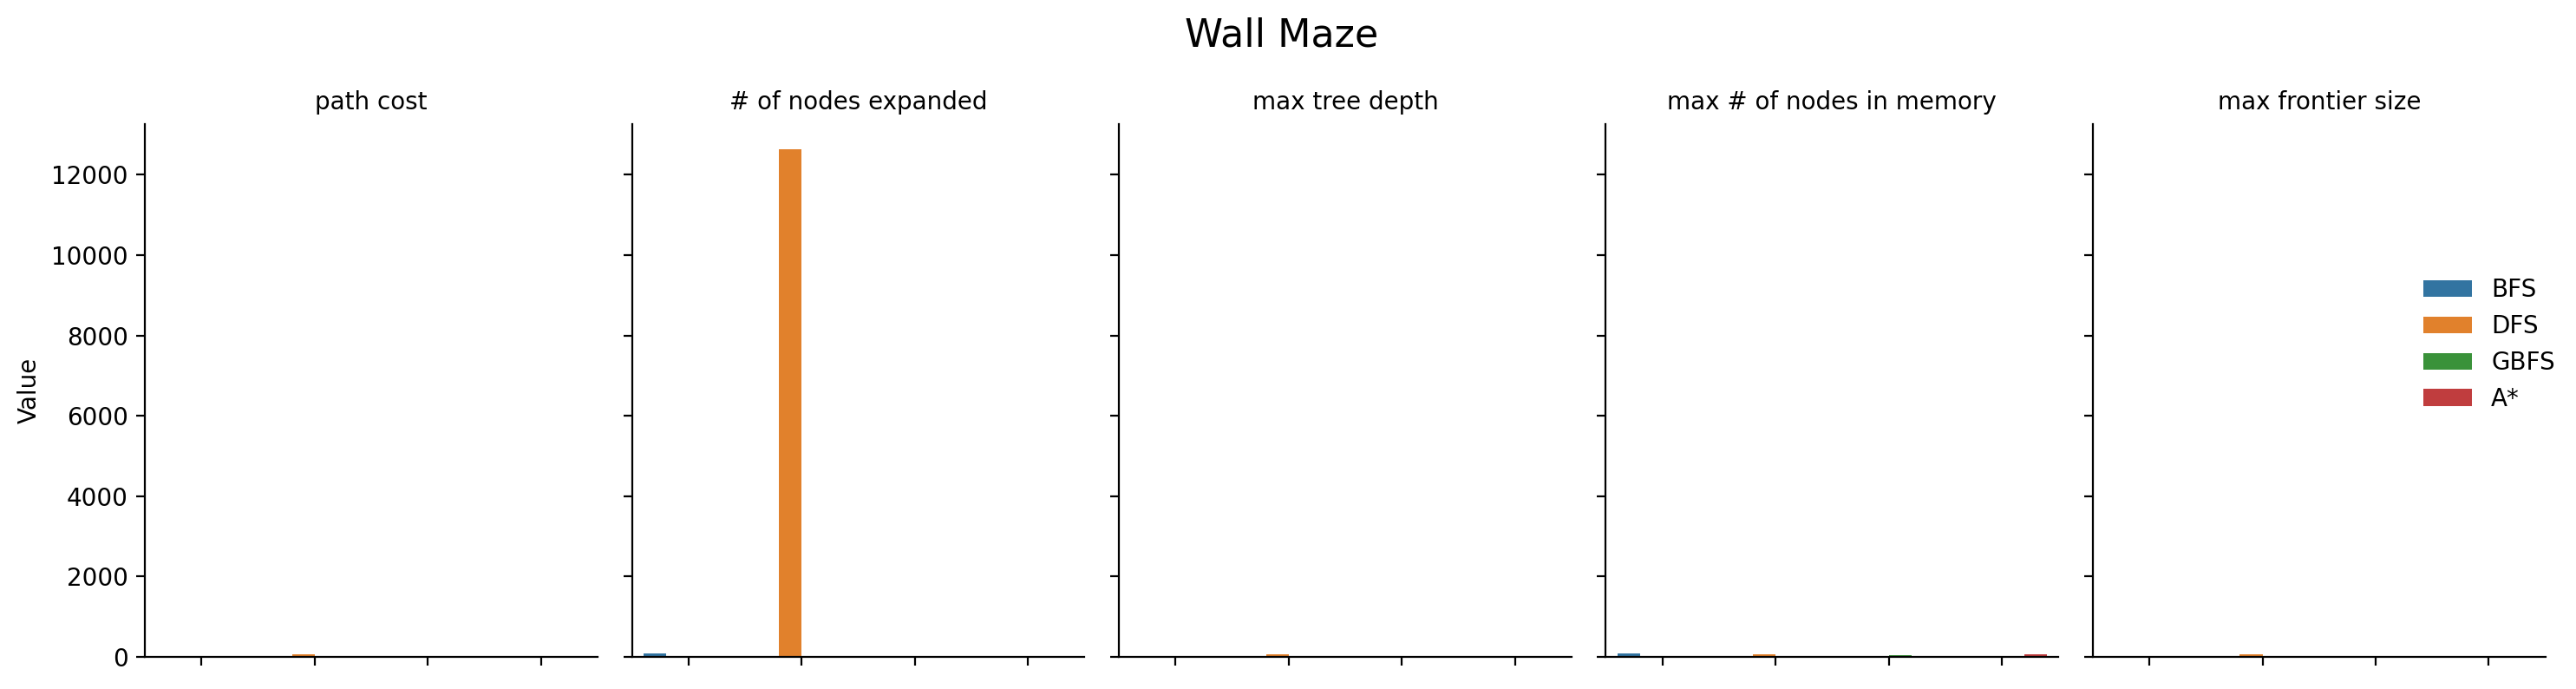

In [154]:
plot_maze_data('wall', dataframes)

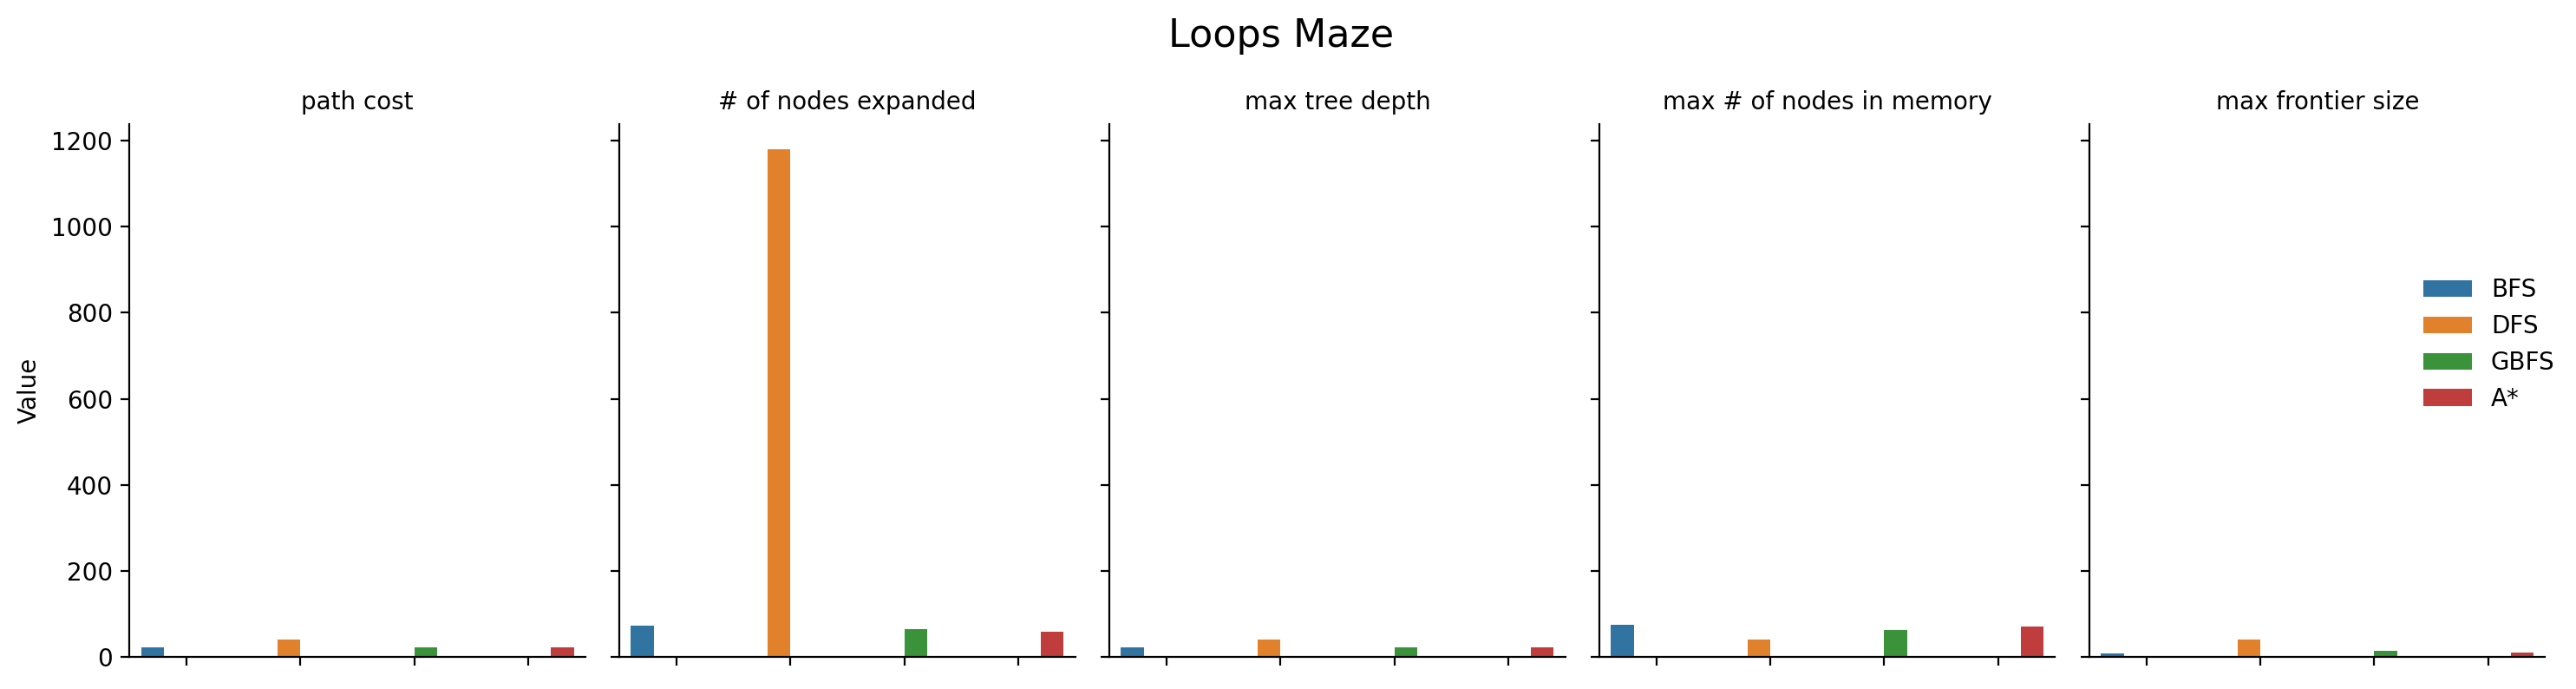

In [155]:
plot_maze_data('loops', dataframes)

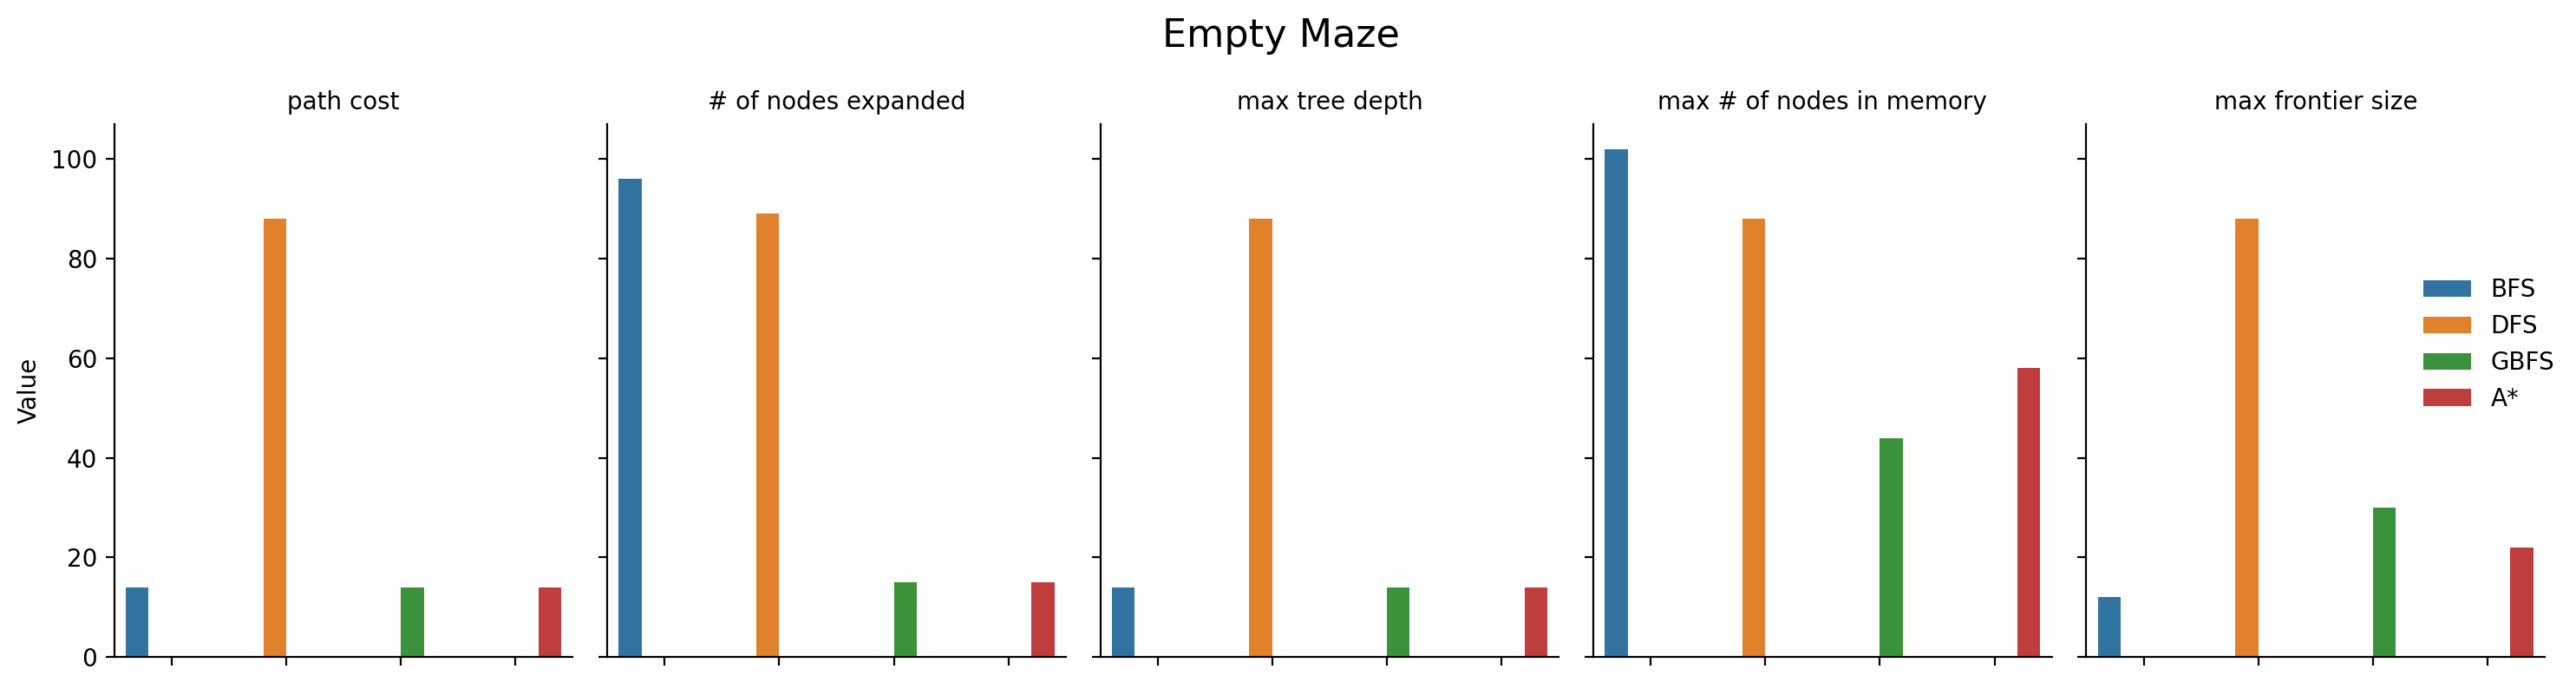

In [156]:
plot_maze_data('empty', dataframes)

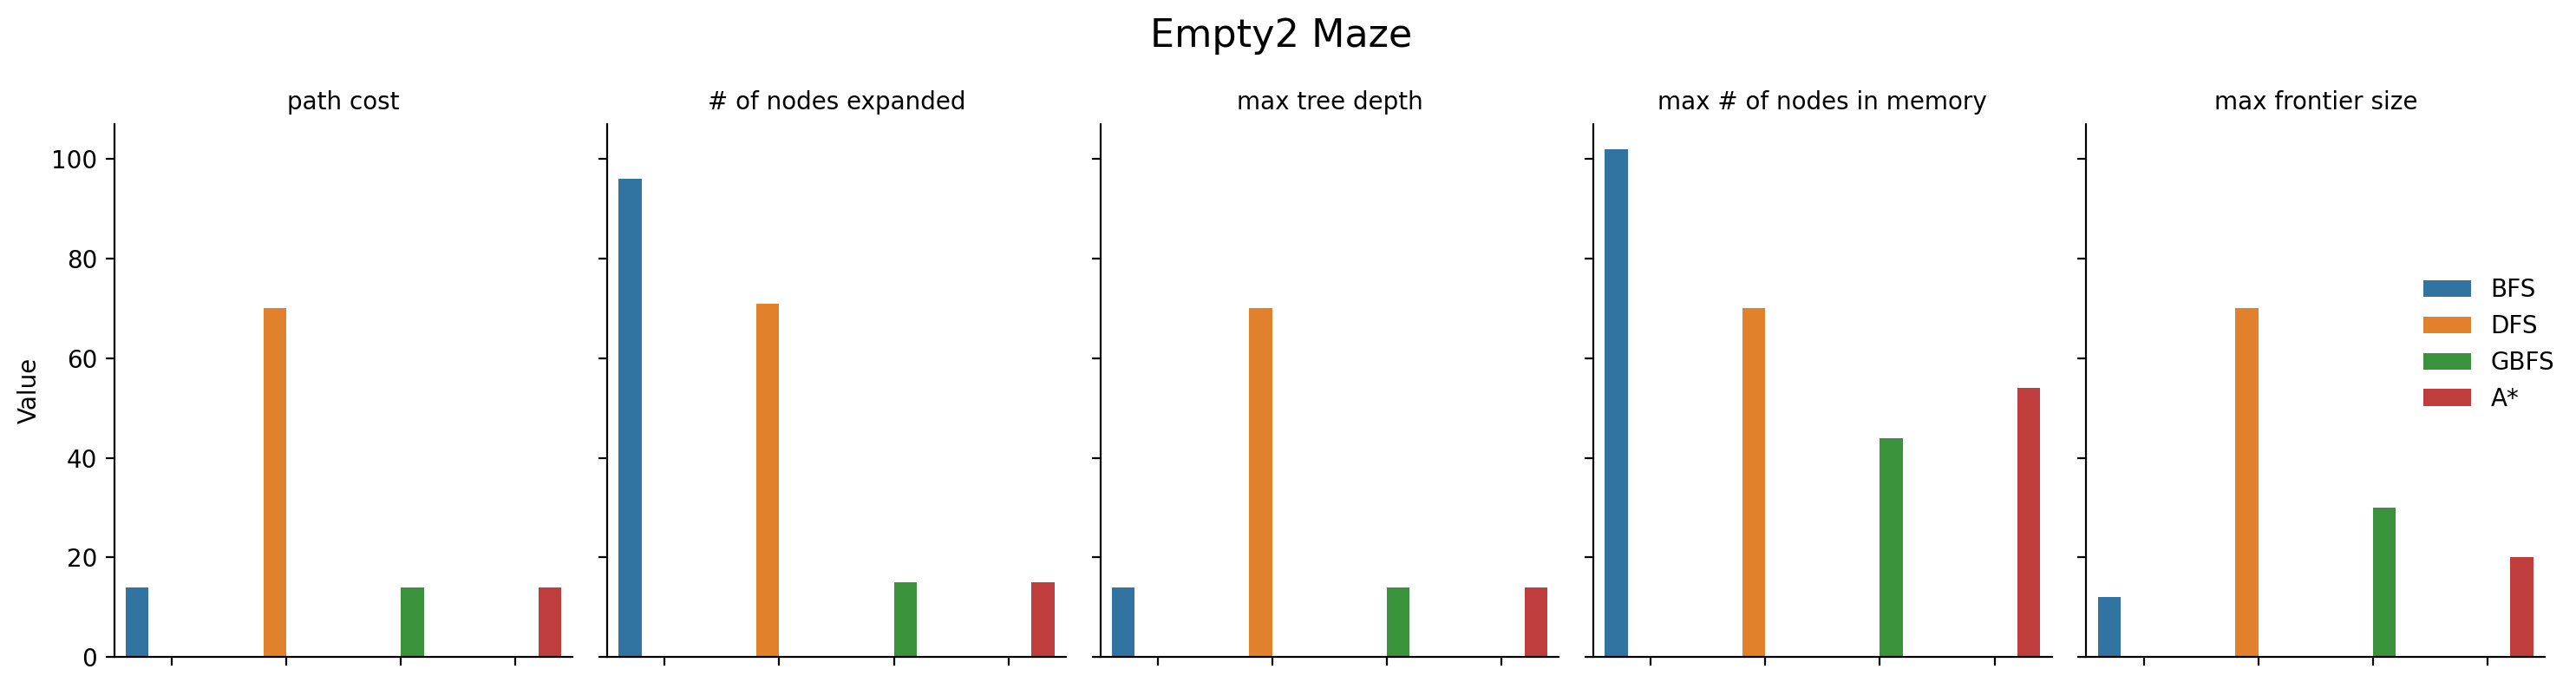

In [157]:
plot_maze_data('empty2', dataframes)

Discuss the most important lessons you have learned from implementing the different search strategies. 

- Open mazes or mazes with very obvious looping structure (i.e., "loops.txt") provided a very hard time to the DFS algorithm.

- In general, A* and GBFS performed better than BFS/DFS (in terms of path cost), and A* was slightly less costly than GBFS. However, GBFS proved to require less memory than A* to store nodes.

- DFS proved what we learned in class/from the textbook... It was not optimal and was not complete for every maze. Though intuitively I thought DFS would make sense in that it searches deep for the goal, I now visually can see why this approach when not improved (such as with IDS) does not perform well, especially in open or looping areas. I am excited to see how IDS performs, though.

## Graduate student advanced task: IDS and Multiple goals [10 Points]

__Undergraduate students:__ This is a bonus task you can attempt if you like [+5 Bonus Points].

Create a few mazes with multiple goals by adding one or two more goals to the medium size maze.
Solve the maze with your implementations for DFS, BFS, and implement in addition IDS (iterative deepening search using DFS). 

Run experiments to show which implementations find the optimal solution and which do not. Discuss why that is the case.

In [ ]:
# # #Pseudocode from textbook for reference

# function ITERATIVE-DEEPENING-SEARCH(problem) returns a solution node or faiure
#     for depth = 0 to infinity do
#         result <-- DEPTH-LIMITED-SEARCH(problem, depth)
#         if result does not equal cutoff then return result

# function DEPTH-LIMITED-SEARCH(problem, l) returns a node or failure or cutoff
#     frontier <-- a LIFO queue (stack) with NODE(problem.INITIAL) as an element
#     result <-- failure
#     while not IS-EMPTY(frontier) do
#         node <-- POP(frontier)
#         if problem.IS-GOAL(node.STATE) then return node
#         if DEPTH(node) > l then
#             result <-- cutoff
#         else if not IS-CYCLE(node) do
#             for each child in EXPAND(problem, node) do
#                 add child to frontier
#     return result

# function EXPAND(problem, node) yields nodes
#     s <-- node.STATE
#     for each action in problem.ACTIONS(s) do
#         s' <-- problem.RESULT(s, action)
#         cost <-- node.PATH-COST + problem.ACTION-COST(s, action, s')
#         yield NODE(STATE=s', PARENT=node, ACTION=action, PATH-COST=cost)

In [201]:
def IDS(maze, depth_limit=1000):
    """Iterative Deepening Search"""

    # Newly defined transition function
    def transition(position, action):
        # Returns the new position after taking the action from the given position.
        x, y = position
        if action == "U": x -= 1
        if action == "D": x += 1
        if action == "L": y -= 1
        if action == "R": y += 1
        return x, y
    
    def is_cycle(node):
        """Check if the current node forms a cycle in the path"""
        current = node
        while current.parent:
            if current.parent.pos == node.pos:
                return True
            current = current.parent
        return False
    
    def expand(node):
        """Expand a node and yield all its children"""
        s = node.pos
        for action in possible_actions(maze, s):  # Assuming you have a function `possible_actions`
            s_prime = transition(s, action)  # Using the new 'transition' function
            cost = node.cost + 1  # Incrementing by 1 for simplicity
            yield Node(pos=s_prime, parent=node, action=action, cost=cost)

    def depth_limited_search(l):
        """Depth Limited Search up to a depth l"""
        frontier = [Node(pos=mh.find_pos(maze, what="S"), parent=None, action=None, cost=0)]
        search_result = "failure"  # Renamed this variable to avoid name collision
        nodes_expanded = 0
        max_tree_depth = 0
        max_nodes_in_memory = 0
        max_frontier_size = 0

        while frontier:
            node = frontier.pop()
            nodes_expanded += 1
            max_tree_depth = max(max_tree_depth, node.cost)
            max_nodes_in_memory = max(max_nodes_in_memory, len(node.get_path_from_root()))
            max_frontier_size = max(max_frontier_size, len(frontier))
            
            if node.pos == mh.find_pos(maze, what="G"):
                return node, nodes_expanded, max_tree_depth, max_nodes_in_memory, max_frontier_size
            if node.cost > l:
                search_result = "cutoff"
            elif not is_cycle(node):
                for child in expand(node):
                    frontier.append(child)
        return search_result, nodes_expanded, max_tree_depth, max_nodes_in_memory, max_frontier_size

    # Main loop for IDS
    for depth in range(depth_limit):
        result, nodes_expanded, max_tree_depth, max_nodes_in_memory, max_frontier_size = depth_limited_search(depth)
        if isinstance(result, Node):
            return result, nodes_expanded, max_tree_depth, max_nodes_in_memory, max_frontier_size

    return None, nodes_expanded, max_tree_depth, max_nodes_in_memory, max_frontier_size 


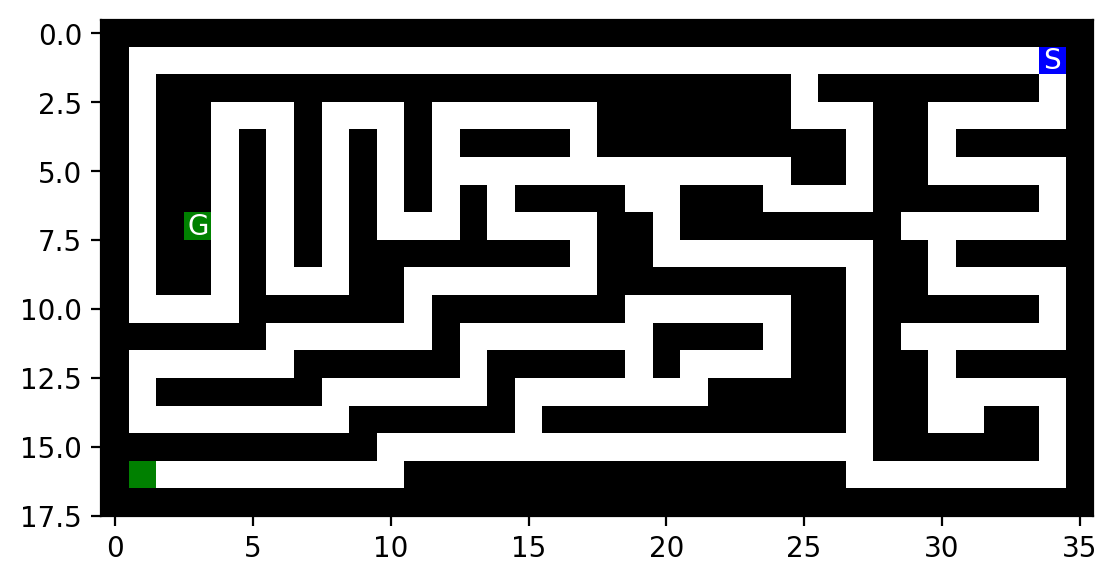

In [181]:
# New modified medium maze (two goals)
with open("mod_medium_maze.txt", "r") as f:
    maze_str = f.read()

maze = mh.parse_maze(maze_str)

mh.show_maze(maze)

Found a path with cost:    49
Number of nodes expanded:  194
Max tree depth:            49
Max nodes in memory:       203
Max frontier size:         8


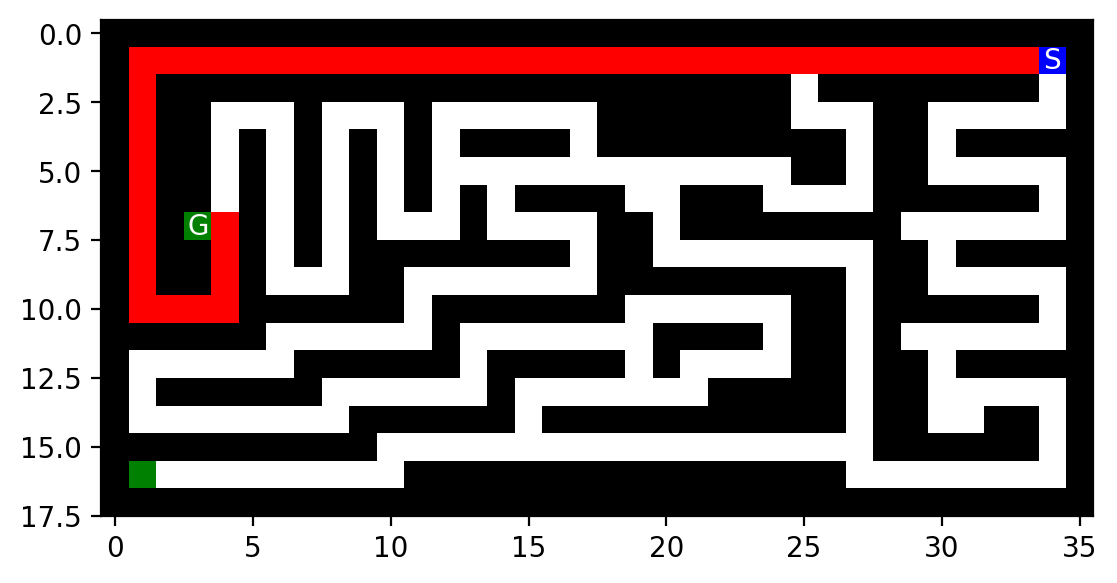

In [182]:
result_node, nodes_expanded, max_tree_depth, max_nodes_in_memory, max_frontier_size = BFS(maze)
    
print(f"Found a path with cost:    {result_node.cost}")
print(f"Number of nodes expanded:  {nodes_expanded}")
print(f"Max tree depth:            {max_tree_depth}")
print(f"Max nodes in memory:       {max_nodes_in_memory}")
print(f"Max frontier size:         {max_frontier_size}")
visualize_path(maze, result_node)

Found a path with cost:    109
Number of nodes expanded:  172
Max tree depth:            161
Max nodes in memory:       161
Max frontier size:         161


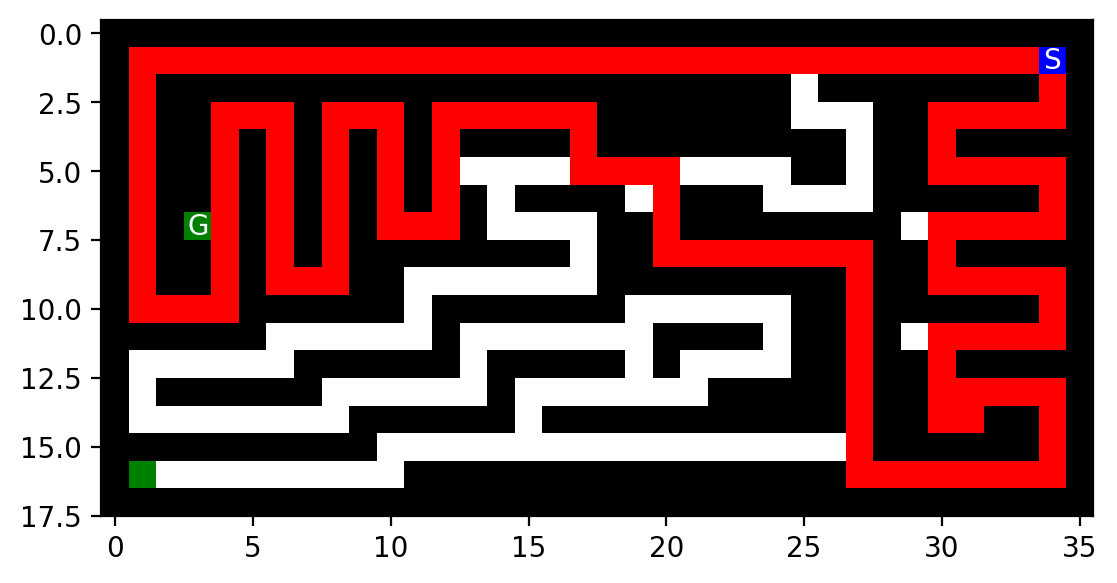

In [183]:
result_node, nodes_expanded, max_tree_depth, max_nodes_in_memory, max_frontier_size = DFS(maze)
    
print(f"Found a path with cost:    {result_node.cost}")
print(f"Number of nodes expanded:  {nodes_expanded}")
print(f"Max tree depth:            {max_tree_depth}")
print(f"Max nodes in memory:       {max_nodes_in_memory}")
print(f"Max frontier size:         {max_frontier_size}")
visualize_path(maze, result_node)

In [206]:
result_node, nodes_expanded, max_tree_depth, max_nodes_in_memory, max_frontier_size = IDS(maze)

if result_node is not None:
    print(f"Found a path with cost:    {result_node.cost}")
    print(f"Number of nodes expanded:  {nodes_expanded}")
    print(f"Max tree depth:            {max_tree_depth}")
    print(f"Max nodes in memory:       {max_nodes_in_memory}")
    print(f"Max frontier size:         {max_frontier_size}")
    visualize_path(maze, result_node)
else:
    print("No path found within the depth limit.")


No path found within the depth limit.


### Note:
I am not sure where I have gone wrong with IDS. I could not get it to work properly. From the above (with IDS depth limit set to 1,000), I would expect IDS to in fact find a solution to our modified medium maze. But at every increased depth limit, IDS failed to find a path, leading me to believe I implemented it incorectly. 

### Note:
Based on the instructions above for modifying medium maze with more goal spaces, I was not sure how 'my_helper.py' was supposed to be modified to accomodate the additional goals. It only would pick up on the first one it found.

## More advanced tasks to think about

Instead of defining each square as a state, use only intersections as states. Now the storage requirement is reduced, but the path length between two intersections can be different. If we use total path length measured as the number of squares as path cost, how can we make sure that BFS and iterative deepening search is optimal? Change the code to do so.

In [ ]:
# Your code/answer goes here

Modify your A* search to add weights (see text book) and explore how different weights influence the result.

In [ ]:
# Your code/answer goes here

What happens if the agent does not know the layout of the maze in advance (i.e., faces an unkown, only partially observable environment)? How does the environment look then (PEAS description)? How would you implement a rational agent to solve the maze? What if the agent still has a GPS device to tell the distance to the goal?

In [ ]:
# Your code/answer goes here